In [1]:
#Modeling with features complete.csv and tests_latest_state_level.csv which contains Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
#and coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d415a
#Merge these 2 files at a state level with common key as Date.

# Single Step Deep Learning Forecasts for West Bengal, Delhi, and Gujrat

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mplcursors
import datetime
from pmdarima.arima import auto_arima
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from tslearn.svm import TimeSeriesSVR
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate

startDate ='2020-01-30'
endDate = '2020-06-05'

In [3]:
from tensorflow.python.keras.layers import Dense, LSTM, RepeatVector
from tensorflow.python.keras import Sequential 

from tensorflow.python.keras.layers import TimeDistributed,Flatten, Bidirectional
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling1D

In [4]:
df1 = pd.read_csv('/Users/shachatt1/Desktop/sharmi/gitfolder/covid-19-analysis/covid-19-latest_6_june/tests_latest_state_level.csv')
df1 = df1.drop(columns=['_d415a', 'source2'])
df1['Date'] = pd.to_datetime(df1['updatedon'], infer_datetime_format=True)

In [5]:
df1.dtypes

coronaenquirycalls                          float64
cumulativepeopleinquarantine                float64
negative                                    float64
numcallsstatehelpline                       float64
numicubeds                                  float64
numisolationbeds                            float64
numventilators                              float64
populationncp2019projection                 float64
positive                                    float64
source1                                      object
state                                        object
tagpeopleinquarantine                        object
tagtotaltested                               object
testpositivityrate                          float64
testspermillion                             float64
testsperpositivecase                        float64
testsperthousand                            float64
totaln95masks                               float64
totalpeoplecurrentlyinquarantine            float64
totalpeopler

In [6]:
df1.shape

(1730, 25)

In [7]:
df1.columns

Index(['coronaenquirycalls', 'cumulativepeopleinquarantine', 'negative',
       'numcallsstatehelpline', 'numicubeds', 'numisolationbeds',
       'numventilators', 'populationncp2019projection', 'positive', 'source1',
       'state', 'tagpeopleinquarantine', 'tagtotaltested',
       'testpositivityrate', 'testspermillion', 'testsperpositivecase',
       'testsperthousand', 'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'updatedon', 'Date'],
      dtype='object')

In [8]:
df1[["testpositivityrate"]] = df1[["testpositivityrate"]].apply(pd.to_numeric)

df1 = df1.drop(columns=['updatedon'])

In [9]:
#pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
stateList = df1['state'].values
print(np.shape(df1))

unique_states = df1['state'].unique()
df_org = df1.copy(deep=False)

all_state_List =[]

for i in range(0, len(unique_states)):
    df1 = df_org.copy(deep=False)
    df1 = df1[df1['state'] == unique_states[i]]
    df1 = df1.drop_duplicates(subset='Date', keep="last")
    date_index = pd.date_range(start=startDate, end=endDate)
    df1= df1.set_index('Date').reindex(date_index).fillna(0).rename_axis('Date').reset_index()
    df1 = df1.replace(0, np.nan)

    df1 = df1.ffill(axis =0)
    df1 = df1.replace(np.nan, 0)

    df1 = df1.reset_index()
    df1['state'] = unique_states[i]

    all_state_List.append(df1)

all_states_df = pd.concat(all_state_List)
all_states_df.reset_index(drop=True)
all_states_df.to_csv('/Users/shachatt1/Desktop/sharmi/gitfolder/covid-19-analysis/covid-19-latest_6_june/transfm_1_tests_latest_state_level.csv', index=False)

(1730, 24)


In [10]:
df2 = pd.read_csv('/Users/shachatt1/Desktop/sharmi/gitfolder/covid-19-analysis/covid-19-latest_6_june/complete.csv')

In [11]:
np.shape(df2)

(2670, 7)

In [12]:
df2.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0


In [13]:
df2.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases          int64
Death                          int64
Cured/Discharged/Migrated      int64
dtype: object

In [14]:
df2['Date'] = pd.to_datetime(df2['Date'], infer_datetime_format=True)

In [15]:
print(unique_states)
print(len(unique_states))

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']
35


In [16]:
list_state_all = []
for j in range(0, len(unique_states)):
    state_data = df2[df2['Name of State / UT'] == unique_states[j]]
    state_testing = all_states_df[all_states_df['state'] == unique_states[j]]
    result = pd.merge(state_data, state_testing, left_on = 'Date', right_on = 'Date', how ='outer')
    result = result.sort_values(by='Date', ascending=True)
    result['Active Cases'] = result['Total Confirmed cases'] - result['Cured/Discharged/Migrated'] - result['Death']
    fname = unique_states[j] + '.csv'
    result.to_csv('all_states/'+ fname)
    list_state_all.append(result)

In [17]:
df_state_all = pd.concat(list_state_all)
df_state_all.to_csv('all_states/all.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [18]:
df_state_all.head()

,Active Cases,Cured/Discharged/Migrated,Date,Death,Latitude,Longitude,Name of State / UT,Total Confirmed cases,coronaenquirycalls,cumulativepeopleinquarantine,...,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed
72,NaN,NaN,2020-01-30,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,NaN,NaN,2020-01-31,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,NaN,NaN,2020-02-01,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,NaN,NaN,2020-02-02,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,NaN,NaN,2020-02-03,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_state_all.shape

(4480, 32)

In [20]:
df_state_all = df_state_all.drop(columns=['Latitude', 'Longitude', 'index'])
df_state_all.shape

(4480, 29)

In [21]:
stateName = unique_states[34]
print(np.shape(df_state_all))
dataset =list_state_all[34]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-25') & (dataset['Date'] <= '2020-06-06')]
print(np.shape(dataset))

(4480, 29)
(128, 32)
West Bengal
(73, 32)


In [22]:
daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

2020-03-25T00:00:00.000000000
2020-06-05T00:00:00.000000000


# LSTM based Prediction for West Bengal with all features

In [23]:
# # convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]


In [24]:
dataset.head()


,Total Confirmed cases,Death,Cured/Discharged/Migrated,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,...,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,Active Cases
7,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
8,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
9,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
10,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
11,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0


In [25]:
dataset.dtypes

Total Confirmed cases                float64
Death                                float64
Cured/Discharged/Migrated            float64
coronaenquirycalls                   float64
cumulativepeopleinquarantine         float64
negative                             float64
numcallsstatehelpline                float64
numicubeds                           float64
numisolationbeds                     float64
numventilators                       float64
populationncp2019projection          float64
positive                             float64
testpositivityrate                   float64
testspermillion                      float64
testsperpositivecase                 float64
testsperthousand                     float64
totaln95masks                        float64
totalpeoplecurrentlyinquarantine     float64
totalpeoplereleasedfromquarantine    float64
totalppe                             float64
totaltested                          float64
unconfirmed                          float64
Active Cas

In [26]:
np.shape(dataset)


(73, 23)

In [27]:
#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

No of features 22
(73, 23)
(73, 23)
(69, 46)


43
(43, 24)
(26, 24)
(43, 23) (43,) (26, 23) (26,)
(43, 1, 23) (43,) (26, 1, 23) (26,)
1 23
Train on 43 samples, validate on 26 samples
Epoch 1/1500
43/43 - 5s - loss: 0.0704 - val_loss: 0.5453
Epoch 2/1500
43/43 - 0s - loss: 0.0662 - val_loss: 0.5399
Epoch 3/1500
43/43 - 0s - loss: 0.0624 - val_loss: 0.5343
Epoch 4/1500
43/43 - 0s - loss: 0.0594 - val_loss: 0.5287
Epoch 5/1500
43/43 - 0s - loss: 0.0574 - val_loss: 0.5230
Epoch 6/1500
43/43 - 0s - loss: 0.0557 - val_loss: 0.5172
Epoch 7/1500
43/43 - 0s - loss: 0.0542 - val_loss: 0.5112
Epoch 8/1500
43/43 - 0s - loss: 0.0530 - val_loss: 0.5051
Epoch 9/1500
43/43 - 0s - loss: 0.0521 - val_loss: 0.4990
Epoch 10/1500
43/43 - 0s - loss: 0.0515 - val_loss: 0.4927
Epoch 11/1500
43/43 - 0s - loss: 0.0511 - val_loss: 0.4864
Epoch 12/1500
43/43 - 0s - loss: 0.0507 - val_loss: 0.4800
Epoch 13/1500
43/43 - 0s - loss: 0.0504 - val_loss: 0.4736
Epoch 14/1500
43/43 - 0s - loss: 0.0502 - val_loss: 0.4674
Epoch 15/1500
43/43 - 0s - loss: 0.0500 - val_l

43/43 - 0s - loss: 0.0053 - val_loss: 0.0818
Epoch 138/1500
43/43 - 0s - loss: 0.0053 - val_loss: 0.0802
Epoch 139/1500
43/43 - 0s - loss: 0.0053 - val_loss: 0.0750
Epoch 140/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0714
Epoch 141/1500
43/43 - 0s - loss: 0.0053 - val_loss: 0.0740
Epoch 142/1500
43/43 - 0s - loss: 0.0051 - val_loss: 0.0780
Epoch 143/1500
43/43 - 0s - loss: 0.0053 - val_loss: 0.0771
Epoch 144/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0726
Epoch 145/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0706
Epoch 146/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0708
Epoch 147/1500
43/43 - 0s - loss: 0.0051 - val_loss: 0.0712
Epoch 148/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0670
Epoch 149/1500
43/43 - 0s - loss: 0.0051 - val_loss: 0.0609
Epoch 150/1500
43/43 - 0s - loss: 0.0052 - val_loss: 0.0614
Epoch 151/1500
43/43 - 0s - loss: 0.0051 - val_loss: 0.0674
Epoch 152/1500
43/43 - 0s - loss: 0.0051 - val_loss: 0.0682
Epoch 153/1500
43/43 - 0s - loss: 0.0050 - val_loss: 0.

Epoch 274/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0244
Epoch 275/1500
43/43 - 0s - loss: 0.0037 - val_loss: 0.0249
Epoch 276/1500
43/43 - 0s - loss: 0.0038 - val_loss: 0.0244
Epoch 277/1500
43/43 - 0s - loss: 0.0038 - val_loss: 0.0242
Epoch 278/1500
43/43 - 0s - loss: 0.0038 - val_loss: 0.0245
Epoch 279/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0247
Epoch 280/1500
43/43 - 0s - loss: 0.0035 - val_loss: 0.0270
Epoch 281/1500
43/43 - 0s - loss: 0.0038 - val_loss: 0.0269
Epoch 282/1500
43/43 - 0s - loss: 0.0038 - val_loss: 0.0252
Epoch 283/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0243
Epoch 284/1500
43/43 - 0s - loss: 0.0035 - val_loss: 0.0242
Epoch 285/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0241
Epoch 286/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0241
Epoch 287/1500
43/43 - 0s - loss: 0.0035 - val_loss: 0.0245
Epoch 288/1500
43/43 - 0s - loss: 0.0034 - val_loss: 0.0264
Epoch 289/1500
43/43 - 0s - loss: 0.0036 - val_loss: 0.0262
Epoch 290/1500
43/43 - 0s - loss: 0.0036

Epoch 411/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0263
Epoch 412/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0270
Epoch 413/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0274
Epoch 414/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0276
Epoch 415/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0266
Epoch 416/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0275
Epoch 417/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0268
Epoch 418/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0281
Epoch 419/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0276
Epoch 420/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0262
Epoch 421/1500
43/43 - 0s - loss: 0.0019 - val_loss: 0.0281
Epoch 422/1500
43/43 - 0s - loss: 0.0021 - val_loss: 0.0272
Epoch 423/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0271
Epoch 424/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0284
Epoch 425/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0283
Epoch 426/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0270
Epoch 427/1500
43/43 - 0s - loss: 0.0018

Epoch 548/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0273
Epoch 549/1500
43/43 - 0s - loss: 0.0019 - val_loss: 0.0278
Epoch 550/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0286
Epoch 551/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0286
Epoch 552/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0285
Epoch 553/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0294
Epoch 554/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0287
Epoch 555/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0290
Epoch 556/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0285
Epoch 557/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0288
Epoch 558/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0285
Epoch 559/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0289
Epoch 560/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0286
Epoch 561/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0287
Epoch 562/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0296
Epoch 563/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0289
Epoch 564/1500
43/43 - 0s - loss: 0.0016

Epoch 685/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0318
Epoch 686/1500
43/43 - 0s - loss: 0.0022 - val_loss: 0.0310
Epoch 687/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0299
Epoch 688/1500
43/43 - 0s - loss: 0.0023 - val_loss: 0.0299
Epoch 689/1500
43/43 - 0s - loss: 0.0019 - val_loss: 0.0306
Epoch 690/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0305
Epoch 691/1500
43/43 - 0s - loss: 0.0021 - val_loss: 0.0300
Epoch 692/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0300
Epoch 693/1500
43/43 - 0s - loss: 0.0024 - val_loss: 0.0303
Epoch 694/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0327
Epoch 695/1500
43/43 - 0s - loss: 0.0024 - val_loss: 0.0324
Epoch 696/1500
43/43 - 0s - loss: 0.0021 - val_loss: 0.0302
Epoch 697/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0301
Epoch 698/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0306
Epoch 699/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0311
Epoch 700/1500
43/43 - 0s - loss: 0.0022 - val_loss: 0.0301
Epoch 701/1500
43/43 - 0s - loss: 0.0017

Epoch 822/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0330
Epoch 823/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0325
Epoch 824/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0331
Epoch 825/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0326
Epoch 826/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0325
Epoch 827/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0334
Epoch 828/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0325
Epoch 829/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0325
Epoch 830/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0334
Epoch 831/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0325
Epoch 832/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0321
Epoch 833/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0328
Epoch 834/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0325
Epoch 835/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0324
Epoch 836/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0334
Epoch 837/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0334
Epoch 838/1500
43/43 - 0s - loss: 0.0015

Epoch 959/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0384
Epoch 960/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0362
Epoch 961/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0359
Epoch 962/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0361
Epoch 963/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0364
Epoch 964/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0371
Epoch 965/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0379
Epoch 966/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0378
Epoch 967/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0374
Epoch 968/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0366
Epoch 969/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0373
Epoch 970/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0365
Epoch 971/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0371
Epoch 972/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0385
Epoch 973/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0384
Epoch 974/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0371
Epoch 975/1500
43/43 - 0s - loss: 0.0015

Epoch 1094/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0376
Epoch 1095/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0385
Epoch 1096/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0413
Epoch 1097/1500
43/43 - 0s - loss: 0.0018 - val_loss: 0.0402
Epoch 1098/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0362
Epoch 1099/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0366
Epoch 1100/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0389
Epoch 1101/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0386
Epoch 1102/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0375
Epoch 1103/1500
43/43 - 0s - loss: 0.0020 - val_loss: 0.0409
Epoch 1104/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0411
Epoch 1105/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0384
Epoch 1106/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0382
Epoch 1107/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0375
Epoch 1108/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0369
Epoch 1109/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0380
Epoch 1110/1500
43/43 - 

Epoch 1229/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0421
Epoch 1230/1500
43/43 - 0s - loss: 0.0017 - val_loss: 0.0399
Epoch 1231/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0403
Epoch 1232/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0419
Epoch 1233/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0398
Epoch 1234/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0403
Epoch 1235/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0401
Epoch 1236/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0403
Epoch 1237/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0416
Epoch 1238/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0407
Epoch 1239/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0413
Epoch 1240/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0395
Epoch 1241/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0399
Epoch 1242/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0407
Epoch 1243/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0400
Epoch 1244/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0410
Epoch 1245/1500
43/43 - 

Epoch 1364/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0395
Epoch 1365/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0405
Epoch 1366/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0394
Epoch 1367/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0394
Epoch 1368/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0410
Epoch 1369/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0410
Epoch 1370/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0395
Epoch 1371/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0411
Epoch 1372/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0405
Epoch 1373/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0391
Epoch 1374/1500
43/43 - 0s - loss: 0.0016 - val_loss: 0.0405
Epoch 1375/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0405
Epoch 1376/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0397
Epoch 1377/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0405
Epoch 1378/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0404
Epoch 1379/1500
43/43 - 0s - loss: 0.0014 - val_loss: 0.0395
Epoch 1380/1500
43/43 - 

Epoch 1499/1500
43/43 - 0s - loss: 0.0013 - val_loss: 0.0398
Epoch 1500/1500
43/43 - 0s - loss: 0.0015 - val_loss: 0.0405


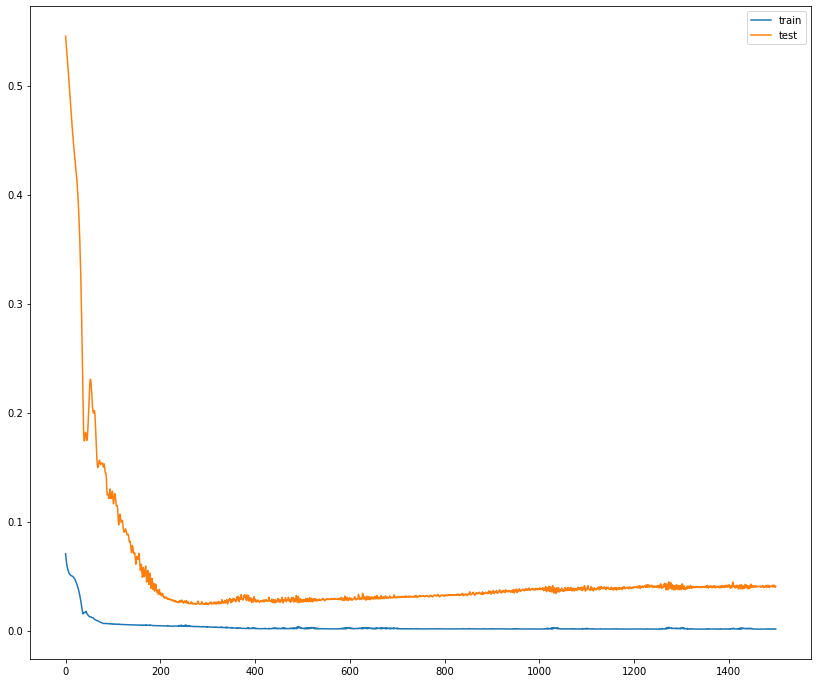

(43, 1, 23) (43,) (26, 23) (26,)


In [28]:
reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])


# design Stacked LSTM networks
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1500, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)




In [29]:
print(np.shape(y_predict))

(26, 1)


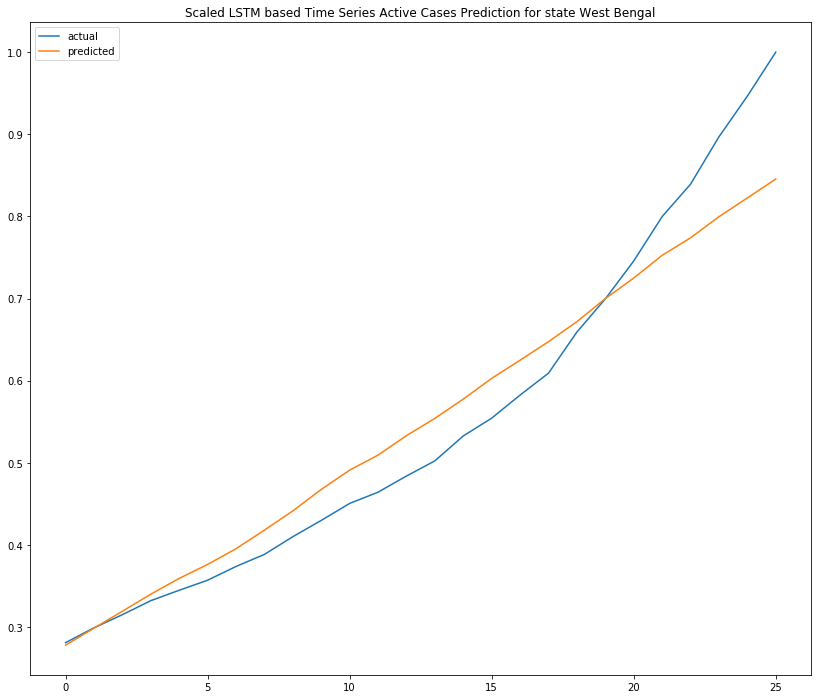

Test RMSE: 0.054
Test RMSE: 372.723
26
2020-05-08T00:00:00.000000000
DatetimeIndex(['2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
               '2020-06-01', '2020-06-02'],
              dtype='datetime64[ns]', freq='D')


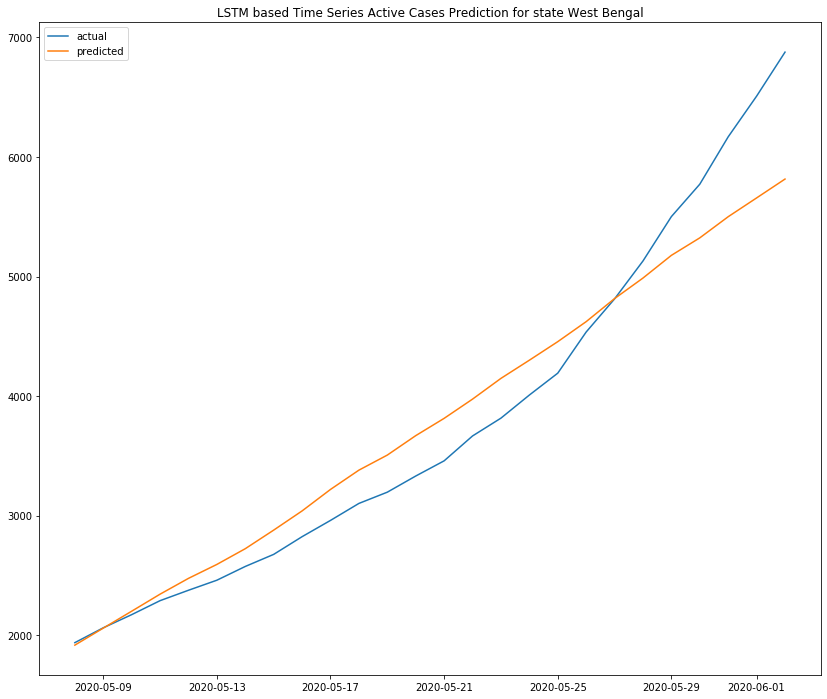

In [30]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Bi-Directional LSTM based Prediction for Delhi (Expanding Window width 3) with all features

In [31]:
stateName = unique_states[8]
print(np.shape(df_state_all))
dataset =list_state_all[8]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

(4480, 29)
(128, 32)
Delhi
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)


In [32]:
#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

No of features 22
(97, 23)
(97, 23)
(95, 46)


58
(58, 24)
(37, 24)
(58, 23) (58,) (37, 23) (37,)
(58, 1, 23) (58,) (37, 1, 23) (37,)
1 23
Train on 58 samples, validate on 37 samples
Epoch 1/1500
58/58 - 4s - loss: 0.0258 - val_loss: 0.3730
Epoch 2/1500
58/58 - 0s - loss: 0.0222 - val_loss: 0.3580
Epoch 3/1500
58/58 - 0s - loss: 0.0190 - val_loss: 0.3436
Epoch 4/1500
58/58 - 0s - loss: 0.0158 - val_loss: 0.3295
Epoch 5/1500
58/58 - 0s - loss: 0.0127 - val_loss: 0.3155
Epoch 6/1500
58/58 - 0s - loss: 0.0100 - val_loss: 0.3019
Epoch 7/1500
58/58 - 0s - loss: 0.0078 - val_loss: 0.2891
Epoch 8/1500
58/58 - 0s - loss: 0.0068 - val_loss: 0.2776
Epoch 9/1500
58/58 - 0s - loss: 0.0067 - val_loss: 0.2684
Epoch 10/1500
58/58 - 0s - loss: 0.0073 - val_loss: 0.2627
Epoch 11/1500
58/58 - 0s - loss: 0.0076 - val_loss: 0.2597
Epoch 12/1500
58/58 - 0s - loss: 0.0077 - val_loss: 0.2590
Epoch 13/1500
58/58 - 0s - loss: 0.0073 - val_loss: 0.2601
Epoch 14/1500
58/58 - 0s - loss: 0.0065 - val_loss: 0.2626
Epoch 15/1500
58/58 - 0s - loss: 0.0057 - val_l

Epoch 138/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1546
Epoch 139/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1565
Epoch 140/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1556
Epoch 141/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1534
Epoch 142/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1545
Epoch 143/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1556
Epoch 144/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1537
Epoch 145/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1541
Epoch 146/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1549
Epoch 147/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1536
Epoch 148/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1552
Epoch 149/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1542
Epoch 150/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1544
Epoch 151/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1552
Epoch 152/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1544
Epoch 153/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1558
Epoch 154/1500
58/58 - 0s - loss: 0.0011

Epoch 275/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1471
Epoch 276/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1445
Epoch 277/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1443
Epoch 278/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1462
Epoch 279/1500
58/58 - 0s - loss: 9.7086e-04 - val_loss: 0.1468
Epoch 280/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1454
Epoch 281/1500
58/58 - 0s - loss: 9.5273e-04 - val_loss: 0.1446
Epoch 282/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1460
Epoch 283/1500
58/58 - 0s - loss: 9.9204e-04 - val_loss: 0.1457
Epoch 284/1500
58/58 - 0s - loss: 9.7204e-04 - val_loss: 0.1441
Epoch 285/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1448
Epoch 286/1500
58/58 - 0s - loss: 9.3836e-04 - val_loss: 0.1455
Epoch 287/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1443
Epoch 288/1500
58/58 - 0s - loss: 9.5188e-04 - val_loss: 0.1441
Epoch 289/1500
58/58 - 0s - loss: 9.7219e-04 - val_loss: 0.1456
Epoch 290/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1449
Epoch 291/15

Epoch 409/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1188
Epoch 410/1500
58/58 - 0s - loss: 9.6203e-04 - val_loss: 0.1186
Epoch 411/1500
58/58 - 0s - loss: 9.8021e-04 - val_loss: 0.1163
Epoch 412/1500
58/58 - 0s - loss: 9.5838e-04 - val_loss: 0.1161
Epoch 413/1500
58/58 - 0s - loss: 9.1760e-04 - val_loss: 0.1180
Epoch 414/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1179
Epoch 415/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1157
Epoch 416/1500
58/58 - 0s - loss: 9.0196e-04 - val_loss: 0.1156
Epoch 417/1500
58/58 - 0s - loss: 8.9228e-04 - val_loss: 0.1174
Epoch 418/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1169
Epoch 419/1500
58/58 - 0s - loss: 9.5416e-04 - val_loss: 0.1145
Epoch 420/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1140
Epoch 421/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1154
Epoch 422/1500
58/58 - 0s - loss: 9.1858e-04 - val_loss: 0.1150
Epoch 423/1500
58/58 - 0s - loss: 9.9423e-04 - val_loss: 0.1129
Epoch 424/1500
58/58 - 0s - loss: 8.6971e-04 - val_loss: 0.1122


Epoch 538/1500
58/58 - 0s - loss: 8.8812e-04 - val_loss: 0.0645
Epoch 539/1500
58/58 - 0s - loss: 8.7137e-04 - val_loss: 0.0661
Epoch 540/1500
58/58 - 0s - loss: 8.8076e-04 - val_loss: 0.0652
Epoch 541/1500
58/58 - 0s - loss: 8.5825e-04 - val_loss: 0.0623
Epoch 542/1500
58/58 - 0s - loss: 8.0466e-04 - val_loss: 0.0619
Epoch 543/1500
58/58 - 0s - loss: 7.4296e-04 - val_loss: 0.0639
Epoch 544/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.0641
Epoch 545/1500
58/58 - 0s - loss: 9.3344e-04 - val_loss: 0.0618
Epoch 546/1500
58/58 - 0s - loss: 8.3185e-04 - val_loss: 0.0621
Epoch 547/1500
58/58 - 0s - loss: 8.1916e-04 - val_loss: 0.0638
Epoch 548/1500
58/58 - 0s - loss: 8.9293e-04 - val_loss: 0.0631
Epoch 549/1500
58/58 - 0s - loss: 8.6454e-04 - val_loss: 0.0601
Epoch 550/1500
58/58 - 0s - loss: 8.0438e-04 - val_loss: 0.0597
Epoch 551/1500
58/58 - 0s - loss: 7.5877e-04 - val_loss: 0.0620
Epoch 552/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.0619
Epoch 553/1500
58/58 - 0s - loss: 9.4652e-04 - v

Epoch 667/1500
58/58 - 0s - loss: 8.3743e-04 - val_loss: 0.0407
Epoch 668/1500
58/58 - 0s - loss: 7.8227e-04 - val_loss: 0.0425
Epoch 669/1500
58/58 - 0s - loss: 8.7146e-04 - val_loss: 0.0421
Epoch 670/1500
58/58 - 0s - loss: 8.4630e-04 - val_loss: 0.0405
Epoch 671/1500
58/58 - 0s - loss: 7.1875e-04 - val_loss: 0.0412
Epoch 672/1500
58/58 - 0s - loss: 6.6330e-04 - val_loss: 0.0419
Epoch 673/1500
58/58 - 0s - loss: 7.5480e-04 - val_loss: 0.0409
Epoch 674/1500
58/58 - 0s - loss: 6.8100e-04 - val_loss: 0.0408
Epoch 675/1500
58/58 - 0s - loss: 6.6493e-04 - val_loss: 0.0394
Epoch 676/1500
58/58 - 0s - loss: 7.6898e-04 - val_loss: 0.0405
Epoch 677/1500
58/58 - 0s - loss: 7.5879e-04 - val_loss: 0.0409
Epoch 678/1500
58/58 - 0s - loss: 6.8457e-04 - val_loss: 0.0400
Epoch 679/1500
58/58 - 0s - loss: 8.5169e-04 - val_loss: 0.0408
Epoch 680/1500
58/58 - 0s - loss: 7.2166e-04 - val_loss: 0.0427
Epoch 681/1500
58/58 - 0s - loss: 9.7207e-04 - val_loss: 0.0423
Epoch 682/1500
58/58 - 0s - loss: 8.9246

Epoch 796/1500
58/58 - 0s - loss: 7.7791e-04 - val_loss: 0.0439
Epoch 797/1500
58/58 - 0s - loss: 7.6202e-04 - val_loss: 0.0443
Epoch 798/1500
58/58 - 0s - loss: 6.8991e-04 - val_loss: 0.0460
Epoch 799/1500
58/58 - 0s - loss: 8.3912e-04 - val_loss: 0.0455
Epoch 800/1500
58/58 - 0s - loss: 7.1608e-04 - val_loss: 0.0434
Epoch 801/1500
58/58 - 0s - loss: 9.3035e-04 - val_loss: 0.0437
Epoch 802/1500
58/58 - 0s - loss: 8.7920e-04 - val_loss: 0.0459
Epoch 803/1500
58/58 - 0s - loss: 7.7284e-04 - val_loss: 0.0461
Epoch 804/1500
58/58 - 0s - loss: 8.7121e-04 - val_loss: 0.0441
Epoch 805/1500
58/58 - 0s - loss: 6.7425e-04 - val_loss: 0.0443
Epoch 806/1500
58/58 - 0s - loss: 6.5523e-04 - val_loss: 0.0439
Epoch 807/1500
58/58 - 0s - loss: 6.5143e-04 - val_loss: 0.0441
Epoch 808/1500
58/58 - 0s - loss: 6.7065e-04 - val_loss: 0.0430
Epoch 809/1500
58/58 - 0s - loss: 7.2221e-04 - val_loss: 0.0436
Epoch 810/1500
58/58 - 0s - loss: 6.9266e-04 - val_loss: 0.0427
Epoch 811/1500
58/58 - 0s - loss: 6.7458

Epoch 926/1500
58/58 - 0s - loss: 7.0761e-04 - val_loss: 0.0419
Epoch 927/1500
58/58 - 0s - loss: 6.5380e-04 - val_loss: 0.0420
Epoch 928/1500
58/58 - 0s - loss: 7.5816e-04 - val_loss: 0.0435
Epoch 929/1500
58/58 - 0s - loss: 7.1707e-04 - val_loss: 0.0429
Epoch 930/1500
58/58 - 0s - loss: 6.8401e-04 - val_loss: 0.0417
Epoch 931/1500
58/58 - 0s - loss: 7.2913e-04 - val_loss: 0.0419
Epoch 932/1500
58/58 - 0s - loss: 7.0272e-04 - val_loss: 0.0408
Epoch 933/1500
58/58 - 0s - loss: 6.7107e-04 - val_loss: 0.0403
Epoch 934/1500
58/58 - 0s - loss: 7.4039e-04 - val_loss: 0.0419
Epoch 935/1500
58/58 - 0s - loss: 7.4902e-04 - val_loss: 0.0416
Epoch 936/1500
58/58 - 0s - loss: 6.5240e-04 - val_loss: 0.0406
Epoch 937/1500
58/58 - 0s - loss: 8.2595e-04 - val_loss: 0.0418
Epoch 938/1500
58/58 - 0s - loss: 6.5396e-04 - val_loss: 0.0431
Epoch 939/1500
58/58 - 0s - loss: 8.6696e-04 - val_loss: 0.0419
Epoch 940/1500
58/58 - 0s - loss: 6.6113e-04 - val_loss: 0.0406
Epoch 941/1500
58/58 - 0s - loss: 9.0408

Epoch 1054/1500
58/58 - 0s - loss: 8.2156e-04 - val_loss: 0.0432
Epoch 1055/1500
58/58 - 0s - loss: 7.6951e-04 - val_loss: 0.0452
Epoch 1056/1500
58/58 - 0s - loss: 8.7484e-04 - val_loss: 0.0448
Epoch 1057/1500
58/58 - 0s - loss: 8.6888e-04 - val_loss: 0.0426
Epoch 1058/1500
58/58 - 0s - loss: 7.2008e-04 - val_loss: 0.0430
Epoch 1059/1500
58/58 - 0s - loss: 6.7207e-04 - val_loss: 0.0449
Epoch 1060/1500
58/58 - 0s - loss: 8.4167e-04 - val_loss: 0.0444
Epoch 1061/1500
58/58 - 0s - loss: 7.0639e-04 - val_loss: 0.0428
Epoch 1062/1500
58/58 - 0s - loss: 8.6485e-04 - val_loss: 0.0434
Epoch 1063/1500
58/58 - 0s - loss: 7.6408e-04 - val_loss: 0.0458
Epoch 1064/1500
58/58 - 0s - loss: 9.0505e-04 - val_loss: 0.0458
Epoch 1065/1500
58/58 - 0s - loss: 9.0645e-04 - val_loss: 0.0436
Epoch 1066/1500
58/58 - 0s - loss: 7.0475e-04 - val_loss: 0.0429
Epoch 1067/1500
58/58 - 0s - loss: 8.2782e-04 - val_loss: 0.0447
Epoch 1068/1500
58/58 - 0s - loss: 7.1108e-04 - val_loss: 0.0450
Epoch 1069/1500
58/58 - 0

58/58 - 0s - loss: 6.4684e-04 - val_loss: 0.0450
Epoch 1181/1500
58/58 - 0s - loss: 8.4349e-04 - val_loss: 0.0459
Epoch 1182/1500
58/58 - 0s - loss: 6.6023e-04 - val_loss: 0.0479
Epoch 1183/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.0475
Epoch 1184/1500
58/58 - 0s - loss: 9.4212e-04 - val_loss: 0.0449
Epoch 1185/1500
58/58 - 0s - loss: 7.4761e-04 - val_loss: 0.0449
Epoch 1186/1500
58/58 - 0s - loss: 7.9110e-04 - val_loss: 0.0471
Epoch 1187/1500
58/58 - 0s - loss: 7.6740e-04 - val_loss: 0.0477
Epoch 1188/1500
58/58 - 0s - loss: 7.5931e-04 - val_loss: 0.0466
Epoch 1189/1500
58/58 - 0s - loss: 7.7354e-04 - val_loss: 0.0472
Epoch 1190/1500
58/58 - 0s - loss: 7.0808e-04 - val_loss: 0.0490
Epoch 1191/1500
58/58 - 0s - loss: 9.1437e-04 - val_loss: 0.0482
Epoch 1192/1500
58/58 - 0s - loss: 8.0552e-04 - val_loss: 0.0454
Epoch 1193/1500
58/58 - 0s - loss: 8.8721e-04 - val_loss: 0.0453
Epoch 1194/1500
58/58 - 0s - loss: 9.0512e-04 - val_loss: 0.0476
Epoch 1195/1500
58/58 - 0s - loss: 7.7929e-04

Epoch 1307/1500
58/58 - 0s - loss: 7.2332e-04 - val_loss: 0.0472
Epoch 1308/1500
58/58 - 0s - loss: 6.5536e-04 - val_loss: 0.0482
Epoch 1309/1500
58/58 - 0s - loss: 7.8561e-04 - val_loss: 0.0472
Epoch 1310/1500
58/58 - 0s - loss: 6.7816e-04 - val_loss: 0.0456
Epoch 1311/1500
58/58 - 0s - loss: 8.4747e-04 - val_loss: 0.0463
Epoch 1312/1500
58/58 - 0s - loss: 7.2520e-04 - val_loss: 0.0483
Epoch 1313/1500
58/58 - 0s - loss: 9.2271e-04 - val_loss: 0.0478
Epoch 1314/1500
58/58 - 0s - loss: 8.2044e-04 - val_loss: 0.0454
Epoch 1315/1500
58/58 - 0s - loss: 8.4812e-04 - val_loss: 0.0454
Epoch 1316/1500
58/58 - 0s - loss: 8.7109e-04 - val_loss: 0.0477
Epoch 1317/1500
58/58 - 0s - loss: 7.4501e-04 - val_loss: 0.0482
Epoch 1318/1500
58/58 - 0s - loss: 7.9508e-04 - val_loss: 0.0470
Epoch 1319/1500
58/58 - 0s - loss: 6.5969e-04 - val_loss: 0.0472
Epoch 1320/1500
58/58 - 0s - loss: 6.6504e-04 - val_loss: 0.0483
Epoch 1321/1500
58/58 - 0s - loss: 7.4778e-04 - val_loss: 0.0478
Epoch 1322/1500
58/58 - 0

58/58 - 0s - loss: 7.0912e-04 - val_loss: 0.0484
Epoch 1434/1500
58/58 - 0s - loss: 7.6797e-04 - val_loss: 0.0473
Epoch 1435/1500
58/58 - 0s - loss: 6.7962e-04 - val_loss: 0.0478
Epoch 1436/1500
58/58 - 0s - loss: 6.6004e-04 - val_loss: 0.0470
Epoch 1437/1500
58/58 - 0s - loss: 6.6881e-04 - val_loss: 0.0480
Epoch 1438/1500
58/58 - 0s - loss: 7.3811e-04 - val_loss: 0.0477
Epoch 1439/1500
58/58 - 0s - loss: 6.8110e-04 - val_loss: 0.0461
Epoch 1440/1500
58/58 - 0s - loss: 8.3605e-04 - val_loss: 0.0468
Epoch 1441/1500
58/58 - 0s - loss: 7.2169e-04 - val_loss: 0.0492
Epoch 1442/1500
58/58 - 0s - loss: 9.4186e-04 - val_loss: 0.0492
Epoch 1443/1500
58/58 - 0s - loss: 8.7034e-04 - val_loss: 0.0470
Epoch 1444/1500
58/58 - 0s - loss: 7.7515e-04 - val_loss: 0.0469
Epoch 1445/1500
58/58 - 0s - loss: 8.1093e-04 - val_loss: 0.0489
Epoch 1446/1500
58/58 - 0s - loss: 7.7844e-04 - val_loss: 0.0488
Epoch 1447/1500
58/58 - 0s - loss: 8.0129e-04 - val_loss: 0.0469
Epoch 1448/1500
58/58 - 0s - loss: 7.5284

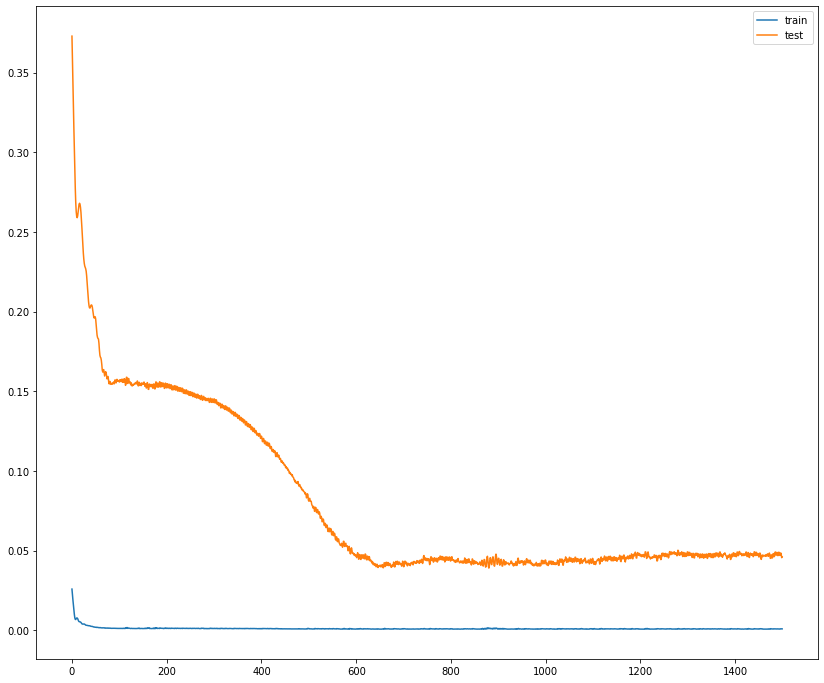

(58, 1, 23) (58,) (37, 23) (37,)


In [33]:
reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])


# design Stacked LSTM networks/Bi-directional LSTM networks
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

# model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))
# model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1500, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [34]:
print(split_factor)
print(daterange[split_factor+1])

58
2020-04-29T00:00:00.000000000


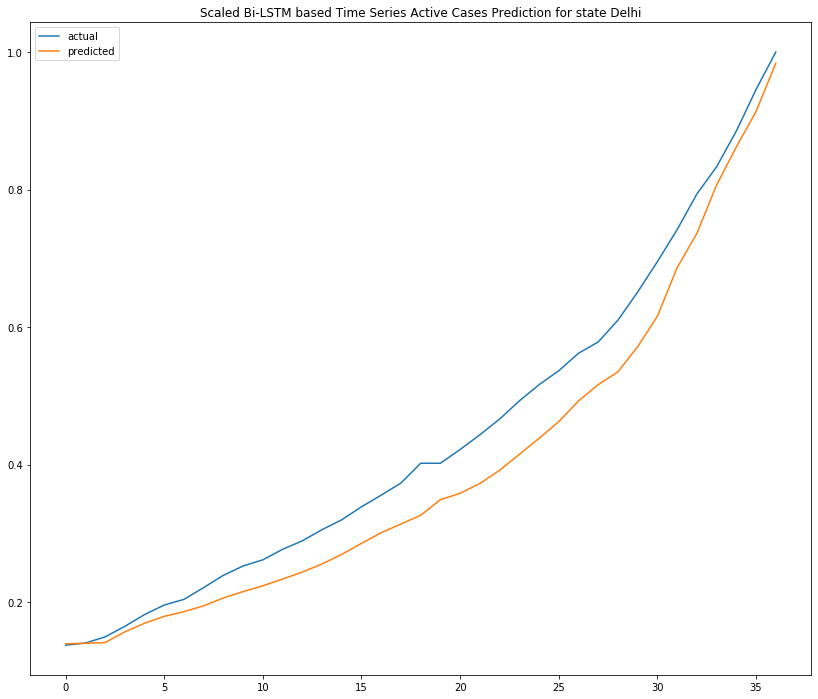

Test RMSE: 0.052
Test RMSE: 1302.368
37
2020-04-29T00:00:00.000000000


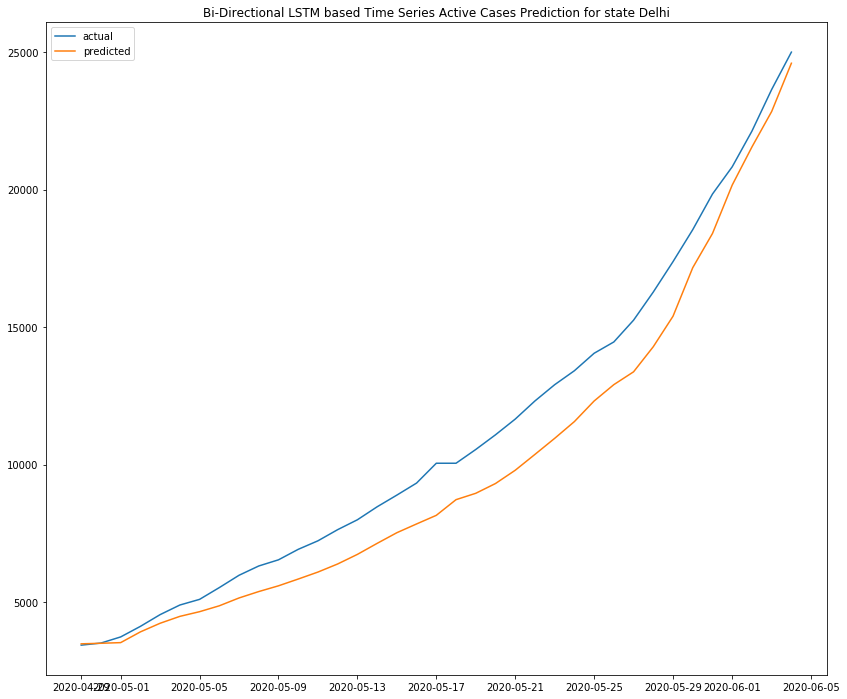

In [35]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled Bi-LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('Bi-Directional LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Stacked - LSTM based Prediction for Delhi with all features

(4480, 29)
(128, 32)
Delhi
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(95, 46)
58
(58, 24)
(37, 24)
(58, 23) (58,) (37, 23) (37,)
(58, 1, 23) (58,) (37, 1, 23) (37,)
1 23
Train on 58 samples, validate on 37 samples
Epoch 1/1500
58/58 - 5s - loss: 0.0326 - val_loss: 0.4420
Epoch 2/1500
58/58 - 0s - loss: 0.0295 - val_loss: 0.4324
Epoch 3/1500
58/58 - 0s - loss: 0.0273 - val_loss: 0.4233
Epoch 4/1500
58/58 - 0s - loss: 0.0251 - val_loss: 0.4146
Epoch 5/1500
58/58 - 0s - loss: 0.0231 - val_loss: 0.4062
Epoch 6/1500
58/58 - 0s - loss: 0.0213 - val_loss: 0.3984
Epoch 7/1500
58/58 - 0s - loss: 0.0197 - val_loss: 0.3909
Epoch 8/1500
58/58 - 0s - loss: 0.0179 - val_loss: 0.3837
Epoch 9/1500
58/58 - 0s - loss: 0.0161 - val_loss: 0.3765
Epoch 10/1500
58/58 - 0s - loss: 0.0141 - val_loss: 0.3693
Epoch 11/1500
58/58 - 0s - loss: 0.0123 - val_loss: 0.3621
Epoch 12/1500
58/58 - 0s - loss: 0.0104 - val_loss: 0.3547
Epoch 13/1500
58/58 - 0s

Epoch 135/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1745
Epoch 136/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1736
Epoch 137/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1721
Epoch 138/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1729
Epoch 139/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1724
Epoch 140/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1728
Epoch 141/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1725
Epoch 142/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1722
Epoch 143/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1727
Epoch 144/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1716
Epoch 145/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1727
Epoch 146/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1726
Epoch 147/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1720
Epoch 148/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1734
Epoch 149/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1725
Epoch 150/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1737
Epoch 151/1500
58/58 - 0s - loss: 0.0013

Epoch 272/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1639
Epoch 273/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1638
Epoch 274/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1613
Epoch 275/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1617
Epoch 276/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1640
Epoch 277/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1607
Epoch 278/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1618
Epoch 279/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1650
Epoch 280/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1636
Epoch 281/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1589
Epoch 282/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1592
Epoch 283/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1623
Epoch 284/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.1603
Epoch 285/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1607
Epoch 286/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1655
Epoch 287/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1658
Epoch 288/1500
58/58 - 0s - loss: 0.0014

Epoch 409/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1515
Epoch 410/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1513
Epoch 411/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1513
Epoch 412/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1521
Epoch 413/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1528
Epoch 414/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1507
Epoch 415/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1510
Epoch 416/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1529
Epoch 417/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1514
Epoch 418/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1516
Epoch 419/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1533
Epoch 420/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1522
Epoch 421/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1528
Epoch 422/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1549
Epoch 423/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1536
Epoch 424/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1518
Epoch 425/1500
58/58 - 0s - loss: 0.0011

Epoch 545/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1435
Epoch 546/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1424
Epoch 547/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1422
Epoch 548/1500
58/58 - 0s - loss: 9.9000e-04 - val_loss: 0.1414
Epoch 549/1500
58/58 - 0s - loss: 9.7567e-04 - val_loss: 0.1399
Epoch 550/1500
58/58 - 0s - loss: 9.9316e-04 - val_loss: 0.1387
Epoch 551/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1411
Epoch 552/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1401
Epoch 553/1500
58/58 - 0s - loss: 9.8405e-04 - val_loss: 0.1388
Epoch 554/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1411
Epoch 555/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1412
Epoch 556/1500
58/58 - 0s - loss: 9.9222e-04 - val_loss: 0.1391
Epoch 557/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1408
Epoch 558/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1411
Epoch 559/1500
58/58 - 0s - loss: 9.8350e-04 - val_loss: 0.1415
Epoch 560/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1417
Epoch 561/1500
5

Epoch 678/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1336
Epoch 679/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1332
Epoch 680/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1319
Epoch 681/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1314
Epoch 682/1500
58/58 - 0s - loss: 9.9547e-04 - val_loss: 0.1313
Epoch 683/1500
58/58 - 0s - loss: 9.4847e-04 - val_loss: 0.1298
Epoch 684/1500
58/58 - 0s - loss: 9.4170e-04 - val_loss: 0.1272
Epoch 685/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1285
Epoch 686/1500
58/58 - 0s - loss: 9.8962e-04 - val_loss: 0.1278
Epoch 687/1500
58/58 - 0s - loss: 9.5503e-04 - val_loss: 0.1265
Epoch 688/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1290
Epoch 689/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1286
Epoch 690/1500
58/58 - 0s - loss: 9.6307e-04 - val_loss: 0.1271
Epoch 691/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1293
Epoch 692/1500
58/58 - 0s - loss: 9.5138e-04 - val_loss: 0.1294
Epoch 693/1500
58/58 - 0s - loss: 9.4125e-04 - val_loss: 0.1284
Epoch 69

Epoch 810/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1224
Epoch 811/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.1215
Epoch 812/1500
58/58 - 0s - loss: 9.7099e-04 - val_loss: 0.1183
Epoch 813/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.1197
Epoch 814/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1248
Epoch 815/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1250
Epoch 816/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1204
Epoch 817/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1205
Epoch 818/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.1247
Epoch 819/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1271
Epoch 820/1500
58/58 - 0s - loss: 0.0016 - val_loss: 0.1244
Epoch 821/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1206
Epoch 822/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1211
Epoch 823/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1237
Epoch 824/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1222
Epoch 825/1500
58/58 - 0s - loss: 9.6623e-04 - val_loss: 0.1203
Epoch 826/1500
58/58 - 0s - loss

58/58 - 0s - loss: 9.3783e-04 - val_loss: 0.1098
Epoch 942/1500
58/58 - 0s - loss: 9.0882e-04 - val_loss: 0.1095
Epoch 943/1500
58/58 - 0s - loss: 8.8508e-04 - val_loss: 0.1096
Epoch 944/1500
58/58 - 0s - loss: 9.7347e-04 - val_loss: 0.1081
Epoch 945/1500
58/58 - 0s - loss: 9.9662e-04 - val_loss: 0.1102
Epoch 946/1500
58/58 - 0s - loss: 9.1308e-04 - val_loss: 0.1111
Epoch 947/1500
58/58 - 0s - loss: 9.9855e-04 - val_loss: 0.1087
Epoch 948/1500
58/58 - 0s - loss: 9.8672e-04 - val_loss: 0.1094
Epoch 949/1500
58/58 - 0s - loss: 9.1838e-04 - val_loss: 0.1112
Epoch 950/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1084
Epoch 951/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1094
Epoch 952/1500
58/58 - 0s - loss: 9.7819e-04 - val_loss: 0.1116
Epoch 953/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1102
Epoch 954/1500
58/58 - 0s - loss: 9.2790e-04 - val_loss: 0.1074
Epoch 955/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.1085
Epoch 956/1500
58/58 - 0s - loss: 8.9606e-04 - val_loss: 0.1080
Epoch 9

58/58 - 0s - loss: 0.0010 - val_loss: 0.1067
Epoch 1072/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1030
Epoch 1073/1500
58/58 - 0s - loss: 9.0885e-04 - val_loss: 0.0981
Epoch 1074/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0975
Epoch 1075/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.1006
Epoch 1076/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1007
Epoch 1077/1500
58/58 - 0s - loss: 8.7686e-04 - val_loss: 0.1006
Epoch 1078/1500
58/58 - 0s - loss: 9.3729e-04 - val_loss: 0.1016
Epoch 1079/1500
58/58 - 0s - loss: 9.4301e-04 - val_loss: 0.1018
Epoch 1080/1500
58/58 - 0s - loss: 9.3855e-04 - val_loss: 0.0999
Epoch 1081/1500
58/58 - 0s - loss: 9.5709e-04 - val_loss: 0.1008
Epoch 1082/1500
58/58 - 0s - loss: 8.8061e-04 - val_loss: 0.1004
Epoch 1083/1500
58/58 - 0s - loss: 9.5300e-04 - val_loss: 0.0984
Epoch 1084/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.1001
Epoch 1085/1500
58/58 - 0s - loss: 9.3843e-04 - val_loss: 0.1044
Epoch 1086/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.1039
Epoc

58/58 - 0s - loss: 9.2035e-04 - val_loss: 0.0960
Epoch 1202/1500
58/58 - 0s - loss: 8.7336e-04 - val_loss: 0.0960
Epoch 1203/1500
58/58 - 0s - loss: 9.1121e-04 - val_loss: 0.0938
Epoch 1204/1500
58/58 - 0s - loss: 9.7544e-04 - val_loss: 0.0945
Epoch 1205/1500
58/58 - 0s - loss: 9.1763e-04 - val_loss: 0.0960
Epoch 1206/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0934
Epoch 1207/1500
58/58 - 0s - loss: 9.0215e-04 - val_loss: 0.0909
Epoch 1208/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0920
Epoch 1209/1500
58/58 - 0s - loss: 8.8483e-04 - val_loss: 0.0941
Epoch 1210/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0921
Epoch 1211/1500
58/58 - 0s - loss: 9.1215e-04 - val_loss: 0.0929
Epoch 1212/1500
58/58 - 0s - loss: 9.4851e-04 - val_loss: 0.0969
Epoch 1213/1500
58/58 - 0s - loss: 9.7465e-04 - val_loss: 0.0973
Epoch 1214/1500
58/58 - 0s - loss: 9.1289e-04 - val_loss: 0.0966
Epoch 1215/1500
58/58 - 0s - loss: 9.2688e-04 - val_loss: 0.0967
Epoch 1216/1500
58/58 - 0s - loss: 9.0096e-04 - val_l

Epoch 1329/1500
58/58 - 0s - loss: 8.6444e-04 - val_loss: 0.0886
Epoch 1330/1500
58/58 - 0s - loss: 8.8950e-04 - val_loss: 0.0873
Epoch 1331/1500
58/58 - 0s - loss: 9.0708e-04 - val_loss: 0.0883
Epoch 1332/1500
58/58 - 0s - loss: 8.6143e-04 - val_loss: 0.0888
Epoch 1333/1500
58/58 - 0s - loss: 8.9658e-04 - val_loss: 0.0869
Epoch 1334/1500
58/58 - 0s - loss: 8.9450e-04 - val_loss: 0.0875
Epoch 1335/1500
58/58 - 0s - loss: 8.5354e-04 - val_loss: 0.0871
Epoch 1336/1500
58/58 - 0s - loss: 8.4754e-04 - val_loss: 0.0866
Epoch 1337/1500
58/58 - 0s - loss: 8.7035e-04 - val_loss: 0.0880
Epoch 1338/1500
58/58 - 0s - loss: 8.7023e-04 - val_loss: 0.0877
Epoch 1339/1500
58/58 - 0s - loss: 8.9074e-04 - val_loss: 0.0891
Epoch 1340/1500
58/58 - 0s - loss: 8.6744e-04 - val_loss: 0.0899
Epoch 1341/1500
58/58 - 0s - loss: 8.8422e-04 - val_loss: 0.0890
Epoch 1342/1500
58/58 - 0s - loss: 8.5228e-04 - val_loss: 0.0875
Epoch 1343/1500
58/58 - 0s - loss: 8.7264e-04 - val_loss: 0.0878
Epoch 1344/1500
58/58 - 0

Epoch 1457/1500
58/58 - 0s - loss: 9.2046e-04 - val_loss: 0.0864
Epoch 1458/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0854
Epoch 1459/1500
58/58 - 0s - loss: 9.7358e-04 - val_loss: 0.0810
Epoch 1460/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0812
Epoch 1461/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0856
Epoch 1462/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0855
Epoch 1463/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0808
Epoch 1464/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0803
Epoch 1465/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0838
Epoch 1466/1500
58/58 - 0s - loss: 9.2501e-04 - val_loss: 0.0869
Epoch 1467/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0858
Epoch 1468/1500
58/58 - 0s - loss: 9.7988e-04 - val_loss: 0.0839
Epoch 1469/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0854
Epoch 1470/1500
58/58 - 0s - loss: 9.8282e-04 - val_loss: 0.0857
Epoch 1471/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.0821
Epoch 1472/1500
58/58 - 0s - loss: 8.5076e-04 - val_loss: 0.0796


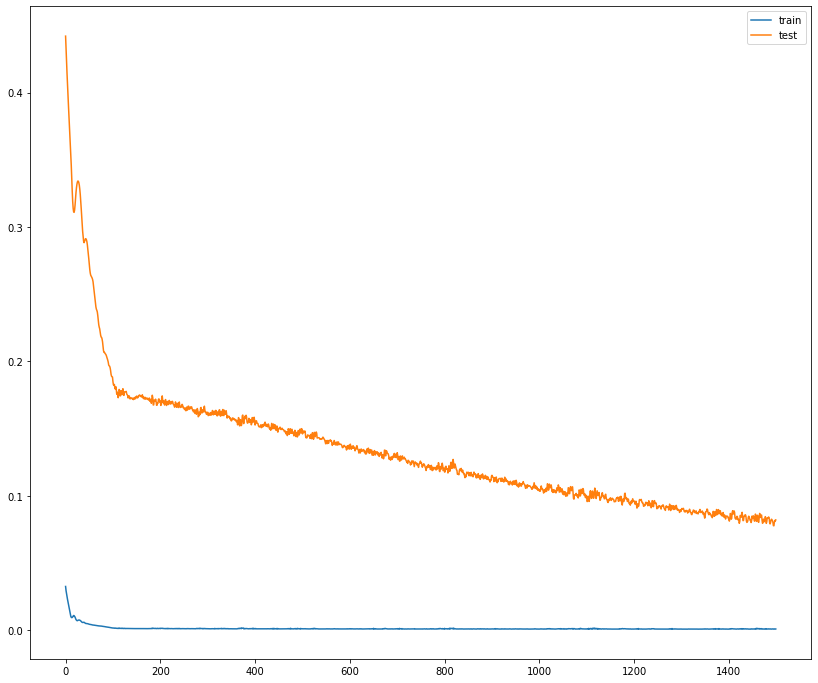

(58, 1, 23) (58,) (37, 23) (37,)


In [36]:
stateName = unique_states[8]
print(np.shape(df_state_all))
dataset =list_state_all[8]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])

# design Stacked LSTM networks
model = Sequential()

#model.add(Bidirectional(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1500, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

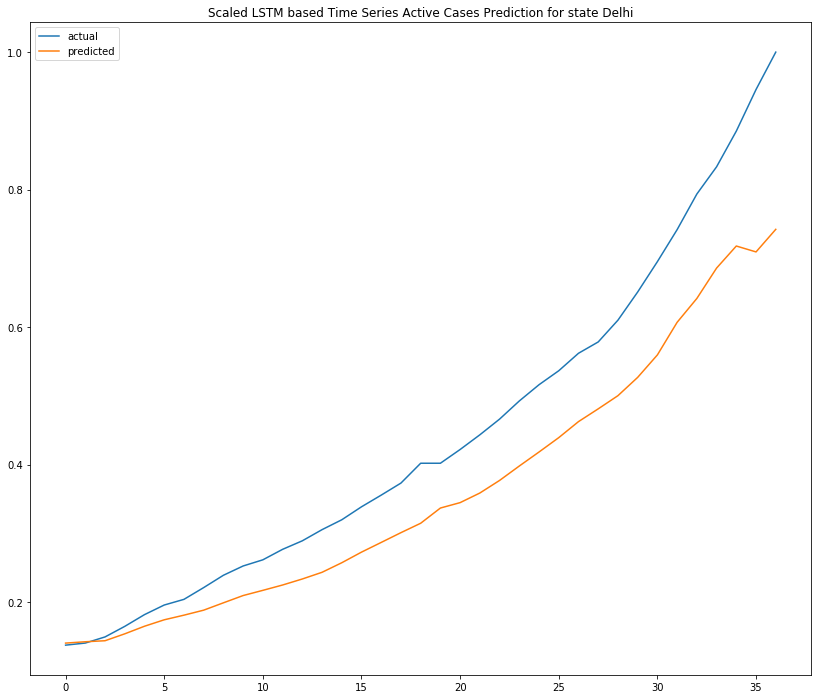

Test RMSE: 0.101
Test RMSE: 2517.206
37
2020-04-29T00:00:00.000000000


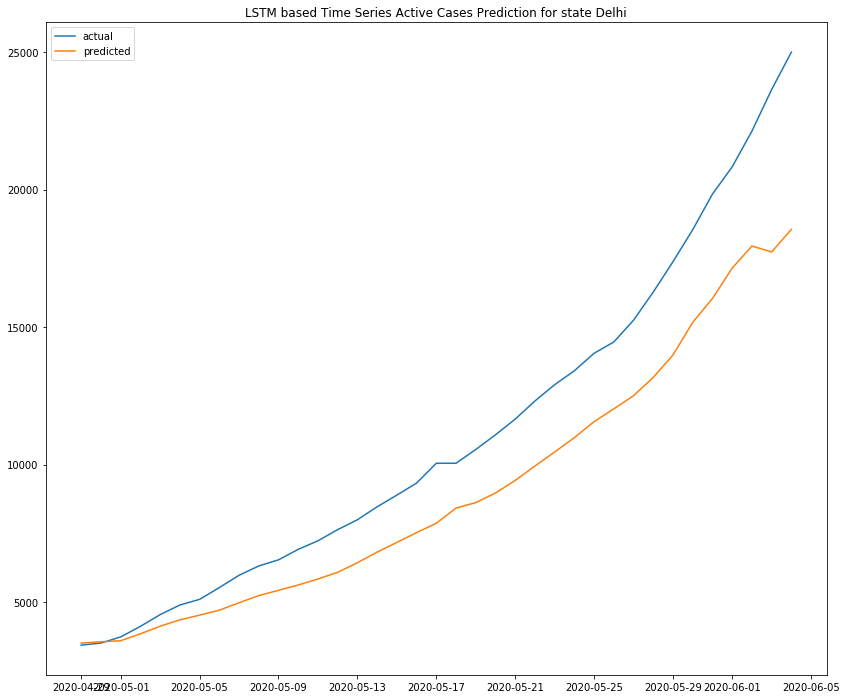

In [37]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# CNN based Prediction for Delhi with all features

(4480, 29)
(128, 32)
Delhi
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(95, 46)
58
(58, 24)
(37, 24)
(58, 23) (58,) (37, 23) (37,)
(58, 23, 1) (58,) (37, 23, 1) (37,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            8256      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
________________________

Epoch 107/1500
58/58 - 0s - loss: 4.3024e-06 - val_loss: 0.1646
Epoch 108/1500
58/58 - 0s - loss: 4.2915e-06 - val_loss: 0.1646
Epoch 109/1500
58/58 - 0s - loss: 4.2721e-06 - val_loss: 0.1644
Epoch 110/1500
58/58 - 0s - loss: 4.2655e-06 - val_loss: 0.1643
Epoch 111/1500
58/58 - 0s - loss: 4.2729e-06 - val_loss: 0.1643
Epoch 112/1500
58/58 - 0s - loss: 4.2774e-06 - val_loss: 0.1643
Epoch 113/1500
58/58 - 0s - loss: 4.2690e-06 - val_loss: 0.1644
Epoch 114/1500
58/58 - 0s - loss: 4.2564e-06 - val_loss: 0.1644
Epoch 115/1500
58/58 - 0s - loss: 4.2520e-06 - val_loss: 0.1645
Epoch 116/1500
58/58 - 0s - loss: 4.2553e-06 - val_loss: 0.1645
Epoch 117/1500
58/58 - 0s - loss: 4.2555e-06 - val_loss: 0.1645
Epoch 118/1500
58/58 - 0s - loss: 4.2476e-06 - val_loss: 0.1644
Epoch 119/1500
58/58 - 0s - loss: 4.2383e-06 - val_loss: 0.1643
Epoch 120/1500
58/58 - 0s - loss: 4.2347e-06 - val_loss: 0.1643
Epoch 121/1500
58/58 - 0s - loss: 4.2346e-06 - val_loss: 0.1643
Epoch 122/1500
58/58 - 0s - loss: 4.2312

58/58 - 0s - loss: 4.0532e-06 - val_loss: 0.1634
Epoch 236/1500
58/58 - 0s - loss: 4.0520e-06 - val_loss: 0.1634
Epoch 237/1500
58/58 - 0s - loss: 4.0507e-06 - val_loss: 0.1634
Epoch 238/1500
58/58 - 0s - loss: 4.0495e-06 - val_loss: 0.1634
Epoch 239/1500
58/58 - 0s - loss: 4.0483e-06 - val_loss: 0.1634
Epoch 240/1500
58/58 - 0s - loss: 4.0470e-06 - val_loss: 0.1634
Epoch 241/1500
58/58 - 0s - loss: 4.0457e-06 - val_loss: 0.1634
Epoch 242/1500
58/58 - 0s - loss: 4.0445e-06 - val_loss: 0.1634
Epoch 243/1500
58/58 - 0s - loss: 4.0432e-06 - val_loss: 0.1634
Epoch 244/1500
58/58 - 0s - loss: 4.0421e-06 - val_loss: 0.1634
Epoch 245/1500
58/58 - 0s - loss: 4.0408e-06 - val_loss: 0.1634
Epoch 246/1500
58/58 - 0s - loss: 4.0394e-06 - val_loss: 0.1634
Epoch 247/1500
58/58 - 0s - loss: 4.0383e-06 - val_loss: 0.1633
Epoch 248/1500
58/58 - 0s - loss: 4.0371e-06 - val_loss: 0.1633
Epoch 249/1500
58/58 - 0s - loss: 4.0356e-06 - val_loss: 0.1633
Epoch 250/1500
58/58 - 0s - loss: 4.0344e-06 - val_loss

Epoch 364/1500
58/58 - 0s - loss: 3.8866e-06 - val_loss: 0.1624
Epoch 365/1500
58/58 - 0s - loss: 3.8854e-06 - val_loss: 0.1624
Epoch 366/1500
58/58 - 0s - loss: 3.8843e-06 - val_loss: 0.1623
Epoch 367/1500
58/58 - 0s - loss: 3.8830e-06 - val_loss: 0.1623
Epoch 368/1500
58/58 - 0s - loss: 3.8818e-06 - val_loss: 0.1623
Epoch 369/1500
58/58 - 0s - loss: 3.8807e-06 - val_loss: 0.1623
Epoch 370/1500
58/58 - 0s - loss: 3.8795e-06 - val_loss: 0.1623
Epoch 371/1500
58/58 - 0s - loss: 3.8784e-06 - val_loss: 0.1623
Epoch 372/1500
58/58 - 0s - loss: 3.8772e-06 - val_loss: 0.1623
Epoch 373/1500
58/58 - 0s - loss: 3.8760e-06 - val_loss: 0.1623
Epoch 374/1500
58/58 - 0s - loss: 3.8748e-06 - val_loss: 0.1623
Epoch 375/1500
58/58 - 0s - loss: 3.8735e-06 - val_loss: 0.1623
Epoch 376/1500
58/58 - 0s - loss: 3.8724e-06 - val_loss: 0.1622
Epoch 377/1500
58/58 - 0s - loss: 3.8713e-06 - val_loss: 0.1622
Epoch 378/1500
58/58 - 0s - loss: 3.8701e-06 - val_loss: 0.1622
Epoch 379/1500
58/58 - 0s - loss: 3.8689

58/58 - 0s - loss: 3.7274e-06 - val_loss: 0.1609
Epoch 493/1500
58/58 - 0s - loss: 3.7263e-06 - val_loss: 0.1609
Epoch 494/1500
58/58 - 0s - loss: 3.7249e-06 - val_loss: 0.1608
Epoch 495/1500
58/58 - 0s - loss: 3.7237e-06 - val_loss: 0.1608
Epoch 496/1500
58/58 - 0s - loss: 3.7225e-06 - val_loss: 0.1608
Epoch 497/1500
58/58 - 0s - loss: 3.7211e-06 - val_loss: 0.1608
Epoch 498/1500
58/58 - 0s - loss: 3.7198e-06 - val_loss: 0.1608
Epoch 499/1500
58/58 - 0s - loss: 3.7185e-06 - val_loss: 0.1608
Epoch 500/1500
58/58 - 0s - loss: 3.7172e-06 - val_loss: 0.1608
Epoch 501/1500
58/58 - 0s - loss: 3.7159e-06 - val_loss: 0.1608
Epoch 502/1500
58/58 - 0s - loss: 3.7146e-06 - val_loss: 0.1607
Epoch 503/1500
58/58 - 0s - loss: 3.7133e-06 - val_loss: 0.1607
Epoch 504/1500
58/58 - 0s - loss: 3.7120e-06 - val_loss: 0.1607
Epoch 505/1500
58/58 - 0s - loss: 3.7107e-06 - val_loss: 0.1607
Epoch 506/1500
58/58 - 0s - loss: 3.7093e-06 - val_loss: 0.1607
Epoch 507/1500
58/58 - 0s - loss: 3.7080e-06 - val_loss

Epoch 621/1500
58/58 - 0s - loss: 3.5408e-06 - val_loss: 0.1584
Epoch 622/1500
58/58 - 0s - loss: 3.5388e-06 - val_loss: 0.1584
Epoch 623/1500
58/58 - 0s - loss: 3.5370e-06 - val_loss: 0.1584
Epoch 624/1500
58/58 - 0s - loss: 3.5350e-06 - val_loss: 0.1584
Epoch 625/1500
58/58 - 0s - loss: 3.5331e-06 - val_loss: 0.1583
Epoch 626/1500
58/58 - 0s - loss: 3.5312e-06 - val_loss: 0.1583
Epoch 627/1500
58/58 - 0s - loss: 3.5293e-06 - val_loss: 0.1583
Epoch 628/1500
58/58 - 0s - loss: 3.5274e-06 - val_loss: 0.1583
Epoch 629/1500
58/58 - 0s - loss: 3.5254e-06 - val_loss: 0.1582
Epoch 630/1500
58/58 - 0s - loss: 3.5234e-06 - val_loss: 0.1582
Epoch 631/1500
58/58 - 0s - loss: 3.5215e-06 - val_loss: 0.1582
Epoch 632/1500
58/58 - 0s - loss: 3.5192e-06 - val_loss: 0.1581
Epoch 633/1500
58/58 - 0s - loss: 3.5167e-06 - val_loss: 0.1581
Epoch 634/1500
58/58 - 0s - loss: 3.5141e-06 - val_loss: 0.1581
Epoch 635/1500
58/58 - 0s - loss: 3.5115e-06 - val_loss: 0.1581
Epoch 636/1500
58/58 - 0s - loss: 3.5085

58/58 - 0s - loss: 3.1156e-06 - val_loss: 0.1529
Epoch 750/1500
58/58 - 0s - loss: 3.1129e-06 - val_loss: 0.1528
Epoch 751/1500
58/58 - 0s - loss: 3.1102e-06 - val_loss: 0.1527
Epoch 752/1500
58/58 - 0s - loss: 3.1075e-06 - val_loss: 0.1527
Epoch 753/1500
58/58 - 0s - loss: 3.1048e-06 - val_loss: 0.1526
Epoch 754/1500
58/58 - 0s - loss: 3.1020e-06 - val_loss: 0.1525
Epoch 755/1500
58/58 - 0s - loss: 3.0995e-06 - val_loss: 0.1525
Epoch 756/1500
58/58 - 0s - loss: 3.0966e-06 - val_loss: 0.1524
Epoch 757/1500
58/58 - 0s - loss: 3.0940e-06 - val_loss: 0.1524
Epoch 758/1500
58/58 - 0s - loss: 3.0913e-06 - val_loss: 0.1523
Epoch 759/1500
58/58 - 0s - loss: 3.0885e-06 - val_loss: 0.1522
Epoch 760/1500
58/58 - 0s - loss: 3.0859e-06 - val_loss: 0.1522
Epoch 761/1500
58/58 - 0s - loss: 3.0831e-06 - val_loss: 0.1521
Epoch 762/1500
58/58 - 0s - loss: 3.0804e-06 - val_loss: 0.1520
Epoch 763/1500
58/58 - 0s - loss: 3.0776e-06 - val_loss: 0.1520
Epoch 764/1500
58/58 - 0s - loss: 3.0749e-06 - val_loss

Epoch 878/1500
58/58 - 0s - loss: 2.7106e-06 - val_loss: 0.1435
Epoch 879/1500
58/58 - 0s - loss: 2.7069e-06 - val_loss: 0.1435
Epoch 880/1500
58/58 - 0s - loss: 2.7021e-06 - val_loss: 0.1434
Epoch 881/1500
58/58 - 0s - loss: 2.6997e-06 - val_loss: 0.1433
Epoch 882/1500
58/58 - 0s - loss: 2.6935e-06 - val_loss: 0.1432
Epoch 883/1500
58/58 - 0s - loss: 2.6913e-06 - val_loss: 0.1431
Epoch 884/1500
58/58 - 0s - loss: 2.6859e-06 - val_loss: 0.1431
Epoch 885/1500
58/58 - 0s - loss: 2.6824e-06 - val_loss: 0.1430
Epoch 886/1500
58/58 - 0s - loss: 2.6786e-06 - val_loss: 0.1428
Epoch 887/1500
58/58 - 0s - loss: 2.6741e-06 - val_loss: 0.1428
Epoch 888/1500
58/58 - 0s - loss: 2.6705e-06 - val_loss: 0.1427
Epoch 889/1500
58/58 - 0s - loss: 2.6661e-06 - val_loss: 0.1426
Epoch 890/1500
58/58 - 0s - loss: 2.6623e-06 - val_loss: 0.1425
Epoch 891/1500
58/58 - 0s - loss: 2.6581e-06 - val_loss: 0.1424
Epoch 892/1500
58/58 - 0s - loss: 2.6545e-06 - val_loss: 0.1423
Epoch 893/1500
58/58 - 0s - loss: 2.6498

Epoch 1006/1500
58/58 - 0s - loss: 2.1415e-06 - val_loss: 0.1299
Epoch 1007/1500
58/58 - 0s - loss: 2.1366e-06 - val_loss: 0.1297
Epoch 1008/1500
58/58 - 0s - loss: 2.1319e-06 - val_loss: 0.1296
Epoch 1009/1500
58/58 - 0s - loss: 2.1269e-06 - val_loss: 0.1295
Epoch 1010/1500
58/58 - 0s - loss: 2.1221e-06 - val_loss: 0.1293
Epoch 1011/1500
58/58 - 0s - loss: 2.1174e-06 - val_loss: 0.1292
Epoch 1012/1500
58/58 - 0s - loss: 2.1127e-06 - val_loss: 0.1291
Epoch 1013/1500
58/58 - 0s - loss: 2.1080e-06 - val_loss: 0.1290
Epoch 1014/1500
58/58 - 0s - loss: 2.1033e-06 - val_loss: 0.1288
Epoch 1015/1500
58/58 - 0s - loss: 2.0985e-06 - val_loss: 0.1287
Epoch 1016/1500
58/58 - 0s - loss: 2.0937e-06 - val_loss: 0.1286
Epoch 1017/1500
58/58 - 0s - loss: 2.0890e-06 - val_loss: 0.1284
Epoch 1018/1500
58/58 - 0s - loss: 2.0842e-06 - val_loss: 0.1283
Epoch 1019/1500
58/58 - 0s - loss: 2.0792e-06 - val_loss: 0.1282
Epoch 1020/1500
58/58 - 0s - loss: 2.0745e-06 - val_loss: 0.1281
Epoch 1021/1500
58/58 - 0

58/58 - 0s - loss: 1.5549e-06 - val_loss: 0.1122
Epoch 1133/1500
58/58 - 0s - loss: 1.5507e-06 - val_loss: 0.1120
Epoch 1134/1500
58/58 - 0s - loss: 1.5464e-06 - val_loss: 0.1119
Epoch 1135/1500
58/58 - 0s - loss: 1.5422e-06 - val_loss: 0.1117
Epoch 1136/1500
58/58 - 0s - loss: 1.5386e-06 - val_loss: 0.1116
Epoch 1137/1500
58/58 - 0s - loss: 1.5340e-06 - val_loss: 0.1114
Epoch 1138/1500
58/58 - 0s - loss: 1.5299e-06 - val_loss: 0.1113
Epoch 1139/1500
58/58 - 0s - loss: 1.5258e-06 - val_loss: 0.1111
Epoch 1140/1500
58/58 - 0s - loss: 1.5216e-06 - val_loss: 0.1110
Epoch 1141/1500
58/58 - 0s - loss: 1.5175e-06 - val_loss: 0.1108
Epoch 1142/1500
58/58 - 0s - loss: 1.5135e-06 - val_loss: 0.1107
Epoch 1143/1500
58/58 - 0s - loss: 1.5095e-06 - val_loss: 0.1105
Epoch 1144/1500
58/58 - 0s - loss: 1.5055e-06 - val_loss: 0.1104
Epoch 1145/1500
58/58 - 0s - loss: 1.5016e-06 - val_loss: 0.1102
Epoch 1146/1500
58/58 - 0s - loss: 1.4979e-06 - val_loss: 0.1101
Epoch 1147/1500
58/58 - 0s - loss: 1.4948

Epoch 1259/1500
58/58 - 0s - loss: 1.1461e-06 - val_loss: 0.1002
Epoch 1260/1500
58/58 - 0s - loss: 1.1436e-06 - val_loss: 0.1000
Epoch 1261/1500
58/58 - 0s - loss: 1.1421e-06 - val_loss: 0.1000
Epoch 1262/1500
58/58 - 0s - loss: 1.1405e-06 - val_loss: 0.0997
Epoch 1263/1500
58/58 - 0s - loss: 1.1377e-06 - val_loss: 0.0997
Epoch 1264/1500
58/58 - 0s - loss: 1.1347e-06 - val_loss: 0.0995
Epoch 1265/1500
58/58 - 0s - loss: 1.1326e-06 - val_loss: 0.0993
Epoch 1266/1500
58/58 - 0s - loss: 1.1310e-06 - val_loss: 0.0992
Epoch 1267/1500
58/58 - 0s - loss: 1.1291e-06 - val_loss: 0.0990
Epoch 1268/1500
58/58 - 0s - loss: 1.1264e-06 - val_loss: 0.0989
Epoch 1269/1500
58/58 - 0s - loss: 1.1238e-06 - val_loss: 0.0988
Epoch 1270/1500
58/58 - 0s - loss: 1.1217e-06 - val_loss: 0.0986
Epoch 1271/1500
58/58 - 0s - loss: 1.1201e-06 - val_loss: 0.0985
Epoch 1272/1500
58/58 - 0s - loss: 1.1181e-06 - val_loss: 0.0983
Epoch 1273/1500
58/58 - 0s - loss: 1.1159e-06 - val_loss: 0.0982
Epoch 1274/1500
58/58 - 0

58/58 - 0s - loss: 9.6566e-07 - val_loss: 0.0853
Epoch 1386/1500
58/58 - 0s - loss: 9.6447e-07 - val_loss: 0.0853
Epoch 1387/1500
58/58 - 0s - loss: 9.6335e-07 - val_loss: 0.0851
Epoch 1388/1500
58/58 - 0s - loss: 9.6253e-07 - val_loss: 0.0851
Epoch 1389/1500
58/58 - 0s - loss: 9.6192e-07 - val_loss: 0.0849
Epoch 1390/1500
58/58 - 0s - loss: 9.6142e-07 - val_loss: 0.0849
Epoch 1391/1500
58/58 - 0s - loss: 9.6137e-07 - val_loss: 0.0847
Epoch 1392/1500
58/58 - 0s - loss: 9.6161e-07 - val_loss: 0.0847
Epoch 1393/1500
58/58 - 0s - loss: 9.6244e-07 - val_loss: 0.0845
Epoch 1394/1500
58/58 - 0s - loss: 9.6407e-07 - val_loss: 0.0846
Epoch 1395/1500
58/58 - 0s - loss: 9.6704e-07 - val_loss: 0.0842
Epoch 1396/1500
58/58 - 0s - loss: 9.7220e-07 - val_loss: 0.0844
Epoch 1397/1500
58/58 - 0s - loss: 9.8078e-07 - val_loss: 0.0840
Epoch 1398/1500
58/58 - 0s - loss: 9.9507e-07 - val_loss: 0.0844
Epoch 1399/1500
58/58 - 0s - loss: 1.0186e-06 - val_loss: 0.0837
Epoch 1400/1500
58/58 - 0s - loss: 1.0573

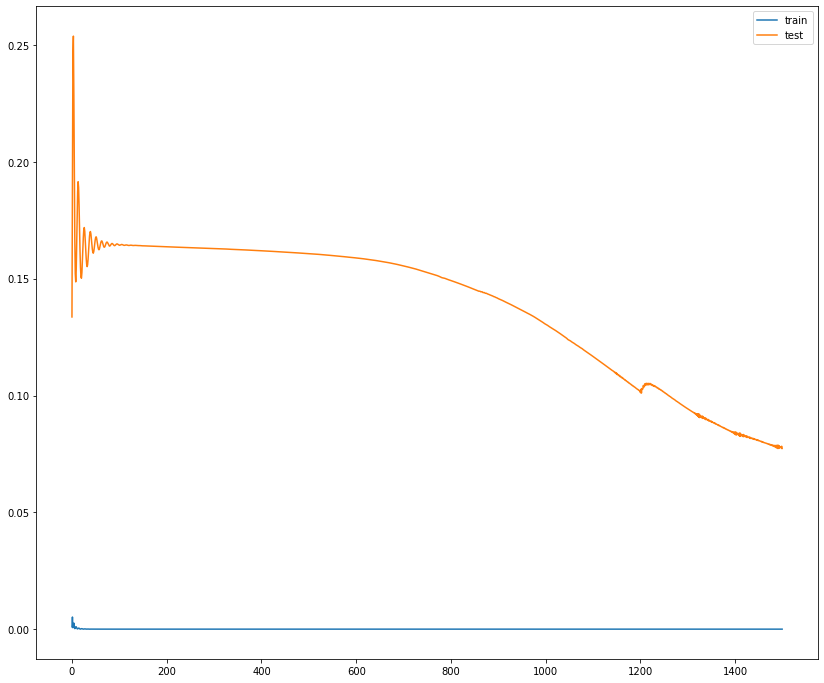

(58, 23, 1) (58,) (37, 23) (37,)


In [38]:
stateName = unique_states[8]
print(np.shape(df_state_all))
dataset =list_state_all[8]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
#fit model
history =model.fit(train_X, train_y, epochs=1500, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

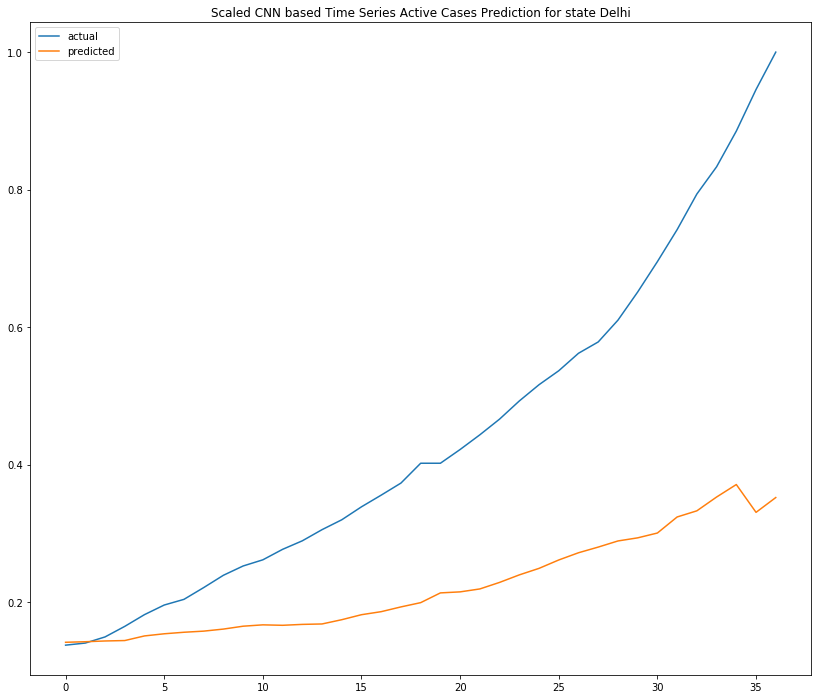

Test RMSE: 0.278
Test RMSE: 6953.818
37
2020-04-29T00:00:00.000000000


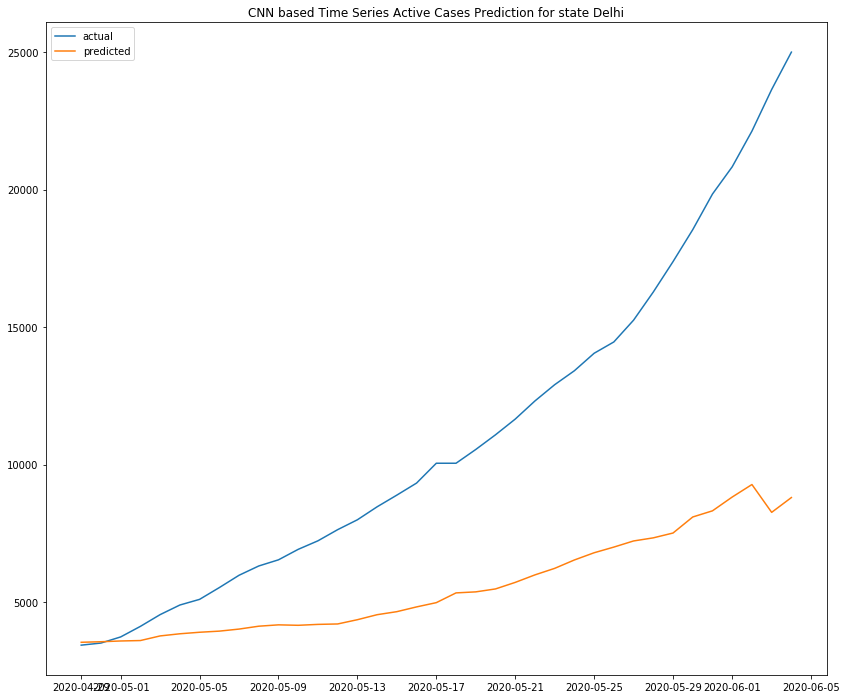

In [39]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

## LSTM + CNN based Prediction for Delhi with all features

(4480, 29)
(128, 32)
Delhi
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(95, 46)
58
(58, 24)
(37, 24)
(58, 23) (58,) (37, 23) (37,)
Train set shape (58, 1, 23, 1)
Validation set shape (37, 1, 23, 1)
Train on 58 samples, validate on 37 samples
Epoch 1/1500
58/58 - 2s - loss: 0.0012 - val_loss: 0.1894
Epoch 2/1500
58/58 - 0s - loss: 1.6085e-04 - val_loss: 0.1585
Epoch 3/1500
58/58 - 0s - loss: 4.0174e-04 - val_loss: 0.1520
Epoch 4/1500
58/58 - 0s - loss: 3.6521e-04 - val_loss: 0.1599
Epoch 5/1500
58/58 - 0s - loss: 1.7491e-04 - val_loss: 0.1725
Epoch 6/1500
58/58 - 0s - loss: 1.3428e-04 - val_loss: 0.1778
Epoch 7/1500
58/58 - 0s - loss: 1.9365e-04 - val_loss: 0.1759
Epoch 8/1500
58/58 - 0s - loss: 1.8362e-04 - val_loss: 0.1683
Epoch 9/1500
58/58 - 0s - loss: 1.2441e-04 - val_loss: 0.1574
Epoch 10/1500
58/58 - 0s - loss: 6.7452e-05 - val_loss: 0.1483
Epoch 11/1500
58/58 - 0s - loss: 8.4183e-05 - val_loss: 0.1420
Epoch 12/1500
58/

58/58 - 0s - loss: 5.1594e-06 - val_loss: 0.1204
Epoch 127/1500
58/58 - 0s - loss: 5.0896e-06 - val_loss: 0.1208
Epoch 128/1500
58/58 - 0s - loss: 5.2233e-06 - val_loss: 0.1206
Epoch 129/1500
58/58 - 0s - loss: 5.1376e-06 - val_loss: 0.1205
Epoch 130/1500
58/58 - 0s - loss: 5.1041e-06 - val_loss: 0.1204
Epoch 131/1500
58/58 - 0s - loss: 5.1319e-06 - val_loss: 0.1206
Epoch 132/1500
58/58 - 0s - loss: 5.2051e-06 - val_loss: 0.1206
Epoch 133/1500
58/58 - 0s - loss: 5.3183e-06 - val_loss: 0.1203
Epoch 134/1500
58/58 - 0s - loss: 5.2246e-06 - val_loss: 0.1210
Epoch 135/1500
58/58 - 0s - loss: 5.1726e-06 - val_loss: 0.1208
Epoch 136/1500
58/58 - 0s - loss: 5.4053e-06 - val_loss: 0.1205
Epoch 137/1500
58/58 - 0s - loss: 5.0622e-06 - val_loss: 0.1210
Epoch 138/1500
58/58 - 0s - loss: 5.2921e-06 - val_loss: 0.1209
Epoch 139/1500
58/58 - 0s - loss: 5.0842e-06 - val_loss: 0.1203
Epoch 140/1500
58/58 - 0s - loss: 5.1716e-06 - val_loss: 0.1207
Epoch 141/1500
58/58 - 0s - loss: 5.0729e-06 - val_loss

Epoch 255/1500
58/58 - 0s - loss: 4.6009e-06 - val_loss: 0.1223
Epoch 256/1500
58/58 - 0s - loss: 4.5748e-06 - val_loss: 0.1227
Epoch 257/1500
58/58 - 0s - loss: 4.6251e-06 - val_loss: 0.1228
Epoch 258/1500
58/58 - 0s - loss: 4.6958e-06 - val_loss: 0.1222
Epoch 259/1500
58/58 - 0s - loss: 4.7008e-06 - val_loss: 0.1229
Epoch 260/1500
58/58 - 0s - loss: 4.5558e-06 - val_loss: 0.1225
Epoch 261/1500
58/58 - 0s - loss: 4.5703e-06 - val_loss: 0.1222
Epoch 262/1500
58/58 - 0s - loss: 4.6617e-06 - val_loss: 0.1225
Epoch 263/1500
58/58 - 0s - loss: 4.5904e-06 - val_loss: 0.1225
Epoch 264/1500
58/58 - 0s - loss: 4.7909e-06 - val_loss: 0.1226
Epoch 265/1500
58/58 - 0s - loss: 4.7079e-06 - val_loss: 0.1233
Epoch 266/1500
58/58 - 0s - loss: 4.7610e-06 - val_loss: 0.1221
Epoch 267/1500
58/58 - 0s - loss: 4.7249e-06 - val_loss: 0.1227
Epoch 268/1500
58/58 - 0s - loss: 4.5922e-06 - val_loss: 0.1231
Epoch 269/1500
58/58 - 0s - loss: 4.7220e-06 - val_loss: 0.1225
Epoch 270/1500
58/58 - 0s - loss: 4.4638

58/58 - 0s - loss: 4.6106e-06 - val_loss: 0.1200
Epoch 384/1500
58/58 - 0s - loss: 4.7503e-06 - val_loss: 0.1193
Epoch 385/1500
58/58 - 0s - loss: 4.5757e-06 - val_loss: 0.1207
Epoch 386/1500
58/58 - 0s - loss: 4.7233e-06 - val_loss: 0.1188
Epoch 387/1500
58/58 - 0s - loss: 4.7652e-06 - val_loss: 0.1197
Epoch 388/1500
58/58 - 0s - loss: 4.2370e-06 - val_loss: 0.1197
Epoch 389/1500
58/58 - 0s - loss: 4.0806e-06 - val_loss: 0.1191
Epoch 390/1500
58/58 - 0s - loss: 4.2469e-06 - val_loss: 0.1196
Epoch 391/1500
58/58 - 0s - loss: 4.3362e-06 - val_loss: 0.1198
Epoch 392/1500
58/58 - 0s - loss: 4.2839e-06 - val_loss: 0.1193
Epoch 393/1500
58/58 - 0s - loss: 4.1913e-06 - val_loss: 0.1202
Epoch 394/1500
58/58 - 0s - loss: 4.3015e-06 - val_loss: 0.1192
Epoch 395/1500
58/58 - 0s - loss: 4.3160e-06 - val_loss: 0.1190
Epoch 396/1500
58/58 - 0s - loss: 4.2072e-06 - val_loss: 0.1197
Epoch 397/1500
58/58 - 0s - loss: 4.0517e-06 - val_loss: 0.1191
Epoch 398/1500
58/58 - 0s - loss: 4.0873e-06 - val_loss

Epoch 512/1500
58/58 - 0s - loss: 4.9829e-06 - val_loss: 0.1159
Epoch 513/1500
58/58 - 0s - loss: 4.5071e-06 - val_loss: 0.1157
Epoch 514/1500
58/58 - 0s - loss: 4.6443e-06 - val_loss: 0.1172
Epoch 515/1500
58/58 - 0s - loss: 3.9191e-06 - val_loss: 0.1151
Epoch 516/1500
58/58 - 0s - loss: 4.7205e-06 - val_loss: 0.1172
Epoch 517/1500
58/58 - 0s - loss: 5.0944e-06 - val_loss: 0.1166
Epoch 518/1500
58/58 - 0s - loss: 4.4051e-06 - val_loss: 0.1146
Epoch 519/1500
58/58 - 0s - loss: 4.5925e-06 - val_loss: 0.1173
Epoch 520/1500
58/58 - 0s - loss: 4.8382e-06 - val_loss: 0.1158
Epoch 521/1500
58/58 - 0s - loss: 4.8147e-06 - val_loss: 0.1157
Epoch 522/1500
58/58 - 0s - loss: 3.7334e-06 - val_loss: 0.1174
Epoch 523/1500
58/58 - 0s - loss: 4.9439e-06 - val_loss: 0.1150
Epoch 524/1500
58/58 - 0s - loss: 4.0108e-06 - val_loss: 0.1160
Epoch 525/1500
58/58 - 0s - loss: 3.7443e-06 - val_loss: 0.1157
Epoch 526/1500
58/58 - 0s - loss: 3.8005e-06 - val_loss: 0.1154
Epoch 527/1500
58/58 - 0s - loss: 3.7548

58/58 - 0s - loss: 3.5021e-06 - val_loss: 0.1113
Epoch 641/1500
58/58 - 0s - loss: 3.4255e-06 - val_loss: 0.1125
Epoch 642/1500
58/58 - 0s - loss: 4.0567e-06 - val_loss: 0.1102
Epoch 643/1500
58/58 - 0s - loss: 3.8047e-06 - val_loss: 0.1119
Epoch 644/1500
58/58 - 0s - loss: 4.4472e-06 - val_loss: 0.1106
Epoch 645/1500
58/58 - 0s - loss: 5.4711e-06 - val_loss: 0.1113
Epoch 646/1500
58/58 - 0s - loss: 3.8931e-06 - val_loss: 0.1125
Epoch 647/1500
58/58 - 0s - loss: 3.5021e-06 - val_loss: 0.1094
Epoch 648/1500
58/58 - 0s - loss: 5.2336e-06 - val_loss: 0.1126
Epoch 649/1500
58/58 - 0s - loss: 4.6053e-06 - val_loss: 0.1104
Epoch 650/1500
58/58 - 0s - loss: 4.3316e-06 - val_loss: 0.1112
Epoch 651/1500
58/58 - 0s - loss: 4.4311e-06 - val_loss: 0.1117
Epoch 652/1500
58/58 - 0s - loss: 3.4528e-06 - val_loss: 0.1105
Epoch 653/1500
58/58 - 0s - loss: 3.4037e-06 - val_loss: 0.1124
Epoch 654/1500
58/58 - 0s - loss: 3.6403e-06 - val_loss: 0.1113
Epoch 655/1500
58/58 - 0s - loss: 3.1201e-06 - val_loss

Epoch 769/1500
58/58 - 0s - loss: 4.7385e-06 - val_loss: 0.1072
Epoch 770/1500
58/58 - 0s - loss: 4.0346e-06 - val_loss: 0.1081
Epoch 771/1500
58/58 - 0s - loss: 3.2096e-06 - val_loss: 0.1092
Epoch 772/1500
58/58 - 0s - loss: 2.9674e-06 - val_loss: 0.1070
Epoch 773/1500
58/58 - 0s - loss: 3.0796e-06 - val_loss: 0.1094
Epoch 774/1500
58/58 - 0s - loss: 3.9728e-06 - val_loss: 0.1068
Epoch 775/1500
58/58 - 0s - loss: 3.4591e-06 - val_loss: 0.1086
Epoch 776/1500
58/58 - 0s - loss: 3.4017e-06 - val_loss: 0.1079
Epoch 777/1500
58/58 - 0s - loss: 2.6300e-06 - val_loss: 0.1064
Epoch 778/1500
58/58 - 0s - loss: 3.1031e-06 - val_loss: 0.1087
Epoch 779/1500
58/58 - 0s - loss: 2.9651e-06 - val_loss: 0.1067
Epoch 780/1500
58/58 - 0s - loss: 3.1480e-06 - val_loss: 0.1083
Epoch 781/1500
58/58 - 0s - loss: 2.6240e-06 - val_loss: 0.1079
Epoch 782/1500
58/58 - 0s - loss: 2.2652e-06 - val_loss: 0.1074
Epoch 783/1500
58/58 - 0s - loss: 2.4079e-06 - val_loss: 0.1081
Epoch 784/1500
58/58 - 0s - loss: 2.8706

58/58 - 0s - loss: 1.5435e-06 - val_loss: 0.1041
Epoch 898/1500
58/58 - 0s - loss: 1.9868e-06 - val_loss: 0.1048
Epoch 899/1500
58/58 - 0s - loss: 1.6779e-06 - val_loss: 0.1039
Epoch 900/1500
58/58 - 0s - loss: 1.7984e-06 - val_loss: 0.1042
Epoch 901/1500
58/58 - 0s - loss: 1.7243e-06 - val_loss: 0.1043
Epoch 902/1500
58/58 - 0s - loss: 1.8057e-06 - val_loss: 0.1040
Epoch 903/1500
58/58 - 0s - loss: 1.9885e-06 - val_loss: 0.1036
Epoch 904/1500
58/58 - 0s - loss: 2.1010e-06 - val_loss: 0.1041
Epoch 905/1500
58/58 - 0s - loss: 2.3166e-06 - val_loss: 0.1034
Epoch 906/1500
58/58 - 0s - loss: 1.6992e-06 - val_loss: 0.1037
Epoch 907/1500
58/58 - 0s - loss: 1.5740e-06 - val_loss: 0.1047
Epoch 908/1500
58/58 - 0s - loss: 1.5091e-06 - val_loss: 0.1033
Epoch 909/1500
58/58 - 0s - loss: 2.0465e-06 - val_loss: 0.1046
Epoch 910/1500
58/58 - 0s - loss: 1.7233e-06 - val_loss: 0.1038
Epoch 911/1500
58/58 - 0s - loss: 1.5711e-06 - val_loss: 0.1043
Epoch 912/1500
58/58 - 0s - loss: 1.7483e-06 - val_loss

Epoch 1025/1500
58/58 - 0s - loss: 1.2385e-06 - val_loss: 0.1052
Epoch 1026/1500
58/58 - 0s - loss: 1.3297e-06 - val_loss: 0.1056
Epoch 1027/1500
58/58 - 0s - loss: 1.3542e-06 - val_loss: 0.1050
Epoch 1028/1500
58/58 - 0s - loss: 1.6527e-06 - val_loss: 0.1058
Epoch 1029/1500
58/58 - 0s - loss: 1.7565e-06 - val_loss: 0.1054
Epoch 1030/1500
58/58 - 0s - loss: 1.4711e-06 - val_loss: 0.1054
Epoch 1031/1500
58/58 - 0s - loss: 1.3209e-06 - val_loss: 0.1059
Epoch 1032/1500
58/58 - 0s - loss: 1.6595e-06 - val_loss: 0.1049
Epoch 1033/1500
58/58 - 0s - loss: 1.5054e-06 - val_loss: 0.1060
Epoch 1034/1500
58/58 - 0s - loss: 1.3125e-06 - val_loss: 0.1049
Epoch 1035/1500
58/58 - 0s - loss: 1.5347e-06 - val_loss: 0.1057
Epoch 1036/1500
58/58 - 0s - loss: 1.4324e-06 - val_loss: 0.1052
Epoch 1037/1500
58/58 - 0s - loss: 1.3065e-06 - val_loss: 0.1057
Epoch 1038/1500
58/58 - 0s - loss: 1.2724e-06 - val_loss: 0.1058
Epoch 1039/1500
58/58 - 0s - loss: 1.3310e-06 - val_loss: 0.1053
Epoch 1040/1500
58/58 - 0

58/58 - 0s - loss: 1.2504e-06 - val_loss: 0.1032
Epoch 1152/1500
58/58 - 0s - loss: 1.9082e-06 - val_loss: 0.1050
Epoch 1153/1500
58/58 - 0s - loss: 2.5243e-06 - val_loss: 0.1039
Epoch 1154/1500
58/58 - 0s - loss: 1.5261e-06 - val_loss: 0.1041
Epoch 1155/1500
58/58 - 0s - loss: 1.4966e-06 - val_loss: 0.1034
Epoch 1156/1500
58/58 - 0s - loss: 1.3078e-06 - val_loss: 0.1044
Epoch 1157/1500
58/58 - 0s - loss: 1.5173e-06 - val_loss: 0.1029
Epoch 1158/1500
58/58 - 0s - loss: 1.4822e-06 - val_loss: 0.1040
Epoch 1159/1500
58/58 - 0s - loss: 1.2952e-06 - val_loss: 0.1031
Epoch 1160/1500
58/58 - 0s - loss: 1.5447e-06 - val_loss: 0.1047
Epoch 1161/1500
58/58 - 0s - loss: 1.6970e-06 - val_loss: 0.1036
Epoch 1162/1500
58/58 - 0s - loss: 1.2445e-06 - val_loss: 0.1040
Epoch 1163/1500
58/58 - 0s - loss: 1.2697e-06 - val_loss: 0.1038
Epoch 1164/1500
58/58 - 0s - loss: 1.1749e-06 - val_loss: 0.1034
Epoch 1165/1500
58/58 - 0s - loss: 1.4428e-06 - val_loss: 0.1041
Epoch 1166/1500
58/58 - 0s - loss: 1.3723

Epoch 1278/1500
58/58 - 0s - loss: 1.8723e-06 - val_loss: 0.1052
Epoch 1279/1500
58/58 - 0s - loss: 2.1253e-06 - val_loss: 0.1033
Epoch 1280/1500
58/58 - 0s - loss: 1.7037e-06 - val_loss: 0.1042
Epoch 1281/1500
58/58 - 0s - loss: 1.1753e-06 - val_loss: 0.1033
Epoch 1282/1500
58/58 - 0s - loss: 1.4723e-06 - val_loss: 0.1044
Epoch 1283/1500
58/58 - 0s - loss: 1.4422e-06 - val_loss: 0.1037
Epoch 1284/1500
58/58 - 0s - loss: 1.0176e-06 - val_loss: 0.1036
Epoch 1285/1500
58/58 - 0s - loss: 1.6619e-06 - val_loss: 0.1041
Epoch 1286/1500
58/58 - 0s - loss: 1.0878e-06 - val_loss: 0.1046
Epoch 1287/1500
58/58 - 0s - loss: 2.1484e-06 - val_loss: 0.1043
Epoch 1288/1500
58/58 - 0s - loss: 1.1836e-06 - val_loss: 0.1041
Epoch 1289/1500
58/58 - 0s - loss: 1.6622e-06 - val_loss: 0.1035
Epoch 1290/1500
58/58 - 0s - loss: 1.6416e-06 - val_loss: 0.1045
Epoch 1291/1500
58/58 - 0s - loss: 1.5540e-06 - val_loss: 0.1037
Epoch 1292/1500
58/58 - 0s - loss: 1.5706e-06 - val_loss: 0.1041
Epoch 1293/1500
58/58 - 0

58/58 - 0s - loss: 1.8328e-06 - val_loss: 0.1071
Epoch 1405/1500
58/58 - 0s - loss: 1.2177e-06 - val_loss: 0.1059
Epoch 1406/1500
58/58 - 0s - loss: 1.8104e-06 - val_loss: 0.1073
Epoch 1407/1500
58/58 - 0s - loss: 1.9301e-06 - val_loss: 0.1053
Epoch 1408/1500
58/58 - 0s - loss: 2.0256e-06 - val_loss: 0.1059
Epoch 1409/1500
58/58 - 0s - loss: 1.5824e-06 - val_loss: 0.1064
Epoch 1410/1500
58/58 - 0s - loss: 1.3178e-06 - val_loss: 0.1050
Epoch 1411/1500
58/58 - 0s - loss: 1.7076e-06 - val_loss: 0.1068
Epoch 1412/1500
58/58 - 0s - loss: 1.7806e-06 - val_loss: 0.1049
Epoch 1413/1500
58/58 - 0s - loss: 1.6501e-06 - val_loss: 0.1066
Epoch 1414/1500
58/58 - 0s - loss: 1.1911e-06 - val_loss: 0.1066
Epoch 1415/1500
58/58 - 0s - loss: 1.1885e-06 - val_loss: 0.1067
Epoch 1416/1500
58/58 - 0s - loss: 1.3136e-06 - val_loss: 0.1066
Epoch 1417/1500
58/58 - 0s - loss: 1.2258e-06 - val_loss: 0.1064
Epoch 1418/1500
58/58 - 0s - loss: 1.1252e-06 - val_loss: 0.1070
Epoch 1419/1500
58/58 - 0s - loss: 1.4401

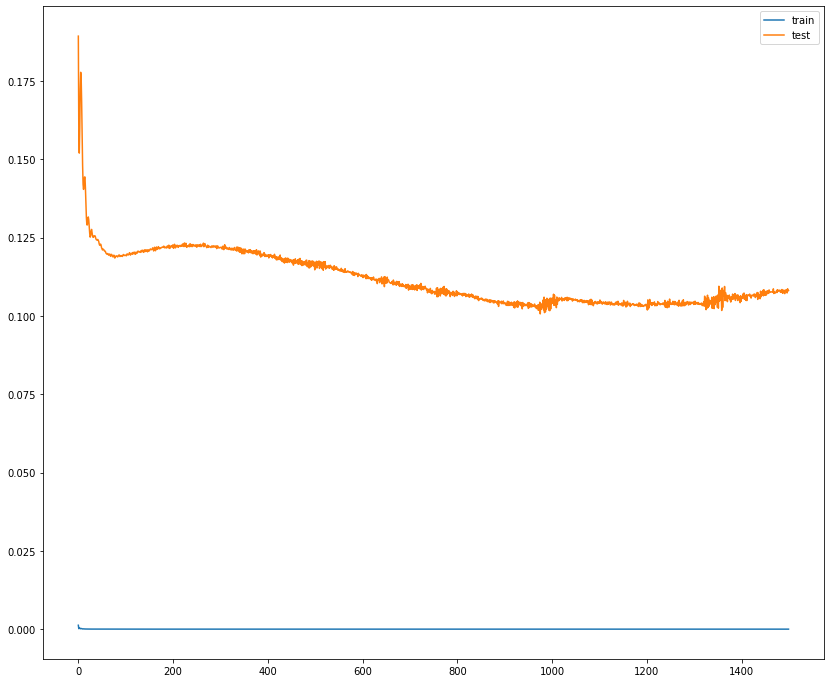

[[0.13918433]
 [0.13998704]
 [0.14046241]
 [0.14096493]
 [0.14680181]
 [0.15015243]
 [0.15184797]
 [0.15410767]
 [0.15721248]
 [0.1609172 ]
 [0.16328691]
 [0.16169049]
 [0.16430022]
 [0.16532649]
 [0.16791438]
 [0.17097412]
 [0.17462716]
 [0.17852302]
 [0.18257047]
 [0.18865903]
 [0.18887855]
 [0.19351326]
 [0.20011745]
 [0.20556031]
 [0.21145396]
 [0.21672611]
 [0.22189601]
 [0.22742496]
 [0.2323103 ]
 [0.23905094]
 [0.247811  ]
 [0.25727406]
 [0.2666249 ]
 [0.277081  ]
 [0.28430814]
 [0.16090569]
 [0.17308356]]


In [40]:
stateName = unique_states[8]
print(np.shape(df_state_all))
dataset =list_state_all[8]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#LSTM + CNN
subsequences = 1
timesteps = train_X.shape[1]
X_train_series_sub = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)


model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_valid_series_sub.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train_series_sub, train_y, validation_data=(X_valid_series_sub, test_y), epochs=1500, verbose=2)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction (LSTM + CNN)
yhat = model.predict(X_valid_series_sub)
print(yhat)
test_X = X_valid_series_sub.reshape((X_valid_series_sub.shape[0], X_valid_series_sub.shape[2]))

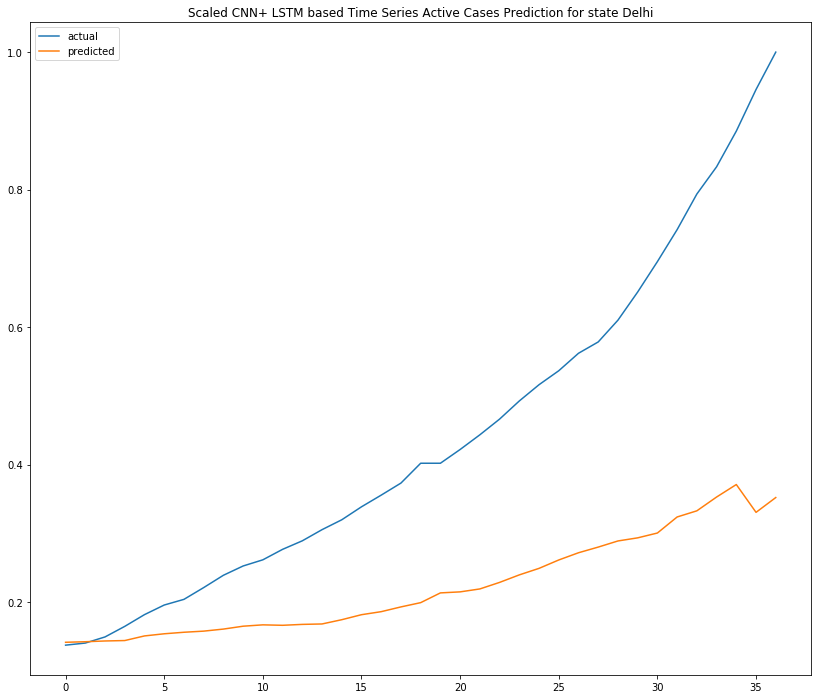

Test RMSE: 0.278
Test RMSE: 6953.818
37
2020-04-29T00:00:00.000000000


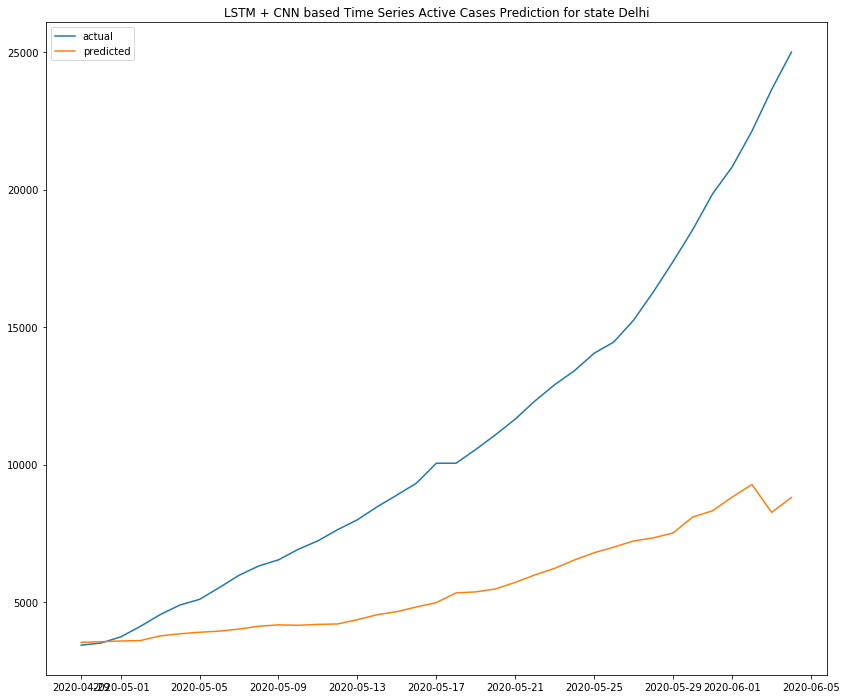

In [41]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled CNN+ LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM + CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# LSTM + CNN based Prediction for Gujrat with all features

(4480, 29)
(128, 32)
Maharashtra
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(88, 46)
58
(58, 24)
(30, 24)
(58, 23) (58,) (30, 23) (30,)
Train set shape (58, 1, 23, 1)
Validation set shape (30, 1, 23, 1)
Train on 58 samples, validate on 30 samples
Epoch 1/1500
58/58 - 2s - loss: 0.0040 - val_loss: 0.3208
Epoch 2/1500
58/58 - 0s - loss: 0.0019 - val_loss: 0.2721
Epoch 3/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.2387
Epoch 4/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.2168
Epoch 5/1500
58/58 - 0s - loss: 0.0016 - val_loss: 0.2097
Epoch 6/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.2118
Epoch 7/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.2163
Epoch 8/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.2213
Epoch 9/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.2246
Epoch 10/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.2245
Epoch 11/1500
58/58 - 0s - loss: 0.0010 - val_loss: 0.2193
Epoch 12/1500
58/58 - 0s - loss: 9.7604e-04 - val_l

Epoch 127/1500
58/58 - 0s - loss: 8.7642e-06 - val_loss: 0.0080
Epoch 128/1500
58/58 - 0s - loss: 9.1386e-06 - val_loss: 0.0078
Epoch 129/1500
58/58 - 0s - loss: 8.6278e-06 - val_loss: 0.0074
Epoch 130/1500
58/58 - 0s - loss: 9.3752e-06 - val_loss: 0.0071
Epoch 131/1500
58/58 - 0s - loss: 8.7452e-06 - val_loss: 0.0075
Epoch 132/1500
58/58 - 0s - loss: 9.2238e-06 - val_loss: 0.0076
Epoch 133/1500
58/58 - 0s - loss: 8.8145e-06 - val_loss: 0.0071
Epoch 134/1500
58/58 - 0s - loss: 8.2841e-06 - val_loss: 0.0068
Epoch 135/1500
58/58 - 0s - loss: 9.0756e-06 - val_loss: 0.0068
Epoch 136/1500
58/58 - 0s - loss: 8.1183e-06 - val_loss: 0.0072
Epoch 137/1500
58/58 - 0s - loss: 9.2450e-06 - val_loss: 0.0071
Epoch 138/1500
58/58 - 0s - loss: 8.6551e-06 - val_loss: 0.0065
Epoch 139/1500
58/58 - 0s - loss: 8.7322e-06 - val_loss: 0.0064
Epoch 140/1500
58/58 - 0s - loss: 8.4195e-06 - val_loss: 0.0068
Epoch 141/1500
58/58 - 0s - loss: 8.6507e-06 - val_loss: 0.0067
Epoch 142/1500
58/58 - 0s - loss: 7.9168

58/58 - 0s - loss: 5.1177e-06 - val_loss: 0.0027
Epoch 256/1500
58/58 - 0s - loss: 4.6662e-06 - val_loss: 0.0027
Epoch 257/1500
58/58 - 0s - loss: 5.0577e-06 - val_loss: 0.0026
Epoch 258/1500
58/58 - 0s - loss: 4.5015e-06 - val_loss: 0.0028
Epoch 259/1500
58/58 - 0s - loss: 4.8199e-06 - val_loss: 0.0027
Epoch 260/1500
58/58 - 0s - loss: 4.5385e-06 - val_loss: 0.0026
Epoch 261/1500
58/58 - 0s - loss: 4.6446e-06 - val_loss: 0.0026
Epoch 262/1500
58/58 - 0s - loss: 4.6162e-06 - val_loss: 0.0026
Epoch 263/1500
58/58 - 0s - loss: 4.6594e-06 - val_loss: 0.0025
Epoch 264/1500
58/58 - 0s - loss: 4.6012e-06 - val_loss: 0.0025
Epoch 265/1500
58/58 - 0s - loss: 4.4829e-06 - val_loss: 0.0026
Epoch 266/1500
58/58 - 0s - loss: 4.6681e-06 - val_loss: 0.0025
Epoch 267/1500
58/58 - 0s - loss: 4.4936e-06 - val_loss: 0.0024
Epoch 268/1500
58/58 - 0s - loss: 4.7050e-06 - val_loss: 0.0025
Epoch 269/1500
58/58 - 0s - loss: 5.6615e-06 - val_loss: 0.0025
Epoch 270/1500
58/58 - 0s - loss: 4.2451e-06 - val_loss

Epoch 384/1500
58/58 - 0s - loss: 3.8696e-06 - val_loss: 0.0021
Epoch 385/1500
58/58 - 0s - loss: 4.2248e-06 - val_loss: 0.0020
Epoch 386/1500
58/58 - 0s - loss: 3.7302e-06 - val_loss: 0.0020
Epoch 387/1500
58/58 - 0s - loss: 4.1235e-06 - val_loss: 0.0020
Epoch 388/1500
58/58 - 0s - loss: 3.7414e-06 - val_loss: 0.0021
Epoch 389/1500
58/58 - 0s - loss: 4.1128e-06 - val_loss: 0.0020
Epoch 390/1500
58/58 - 0s - loss: 4.4185e-06 - val_loss: 0.0020
Epoch 391/1500
58/58 - 0s - loss: 3.7191e-06 - val_loss: 0.0021
Epoch 392/1500
58/58 - 0s - loss: 4.3434e-06 - val_loss: 0.0020
Epoch 393/1500
58/58 - 0s - loss: 3.6640e-06 - val_loss: 0.0019
Epoch 394/1500
58/58 - 0s - loss: 4.4866e-06 - val_loss: 0.0020
Epoch 395/1500
58/58 - 0s - loss: 4.3995e-06 - val_loss: 0.0021
Epoch 396/1500
58/58 - 0s - loss: 4.1117e-06 - val_loss: 0.0020
Epoch 397/1500
58/58 - 0s - loss: 4.3735e-06 - val_loss: 0.0020
Epoch 398/1500
58/58 - 0s - loss: 3.9935e-06 - val_loss: 0.0021
Epoch 399/1500
58/58 - 0s - loss: 3.9593

58/58 - 0s - loss: 3.9768e-06 - val_loss: 0.0020
Epoch 513/1500
58/58 - 0s - loss: 4.5348e-06 - val_loss: 0.0021
Epoch 514/1500
58/58 - 0s - loss: 3.9175e-06 - val_loss: 0.0021
Epoch 515/1500
58/58 - 0s - loss: 3.9292e-06 - val_loss: 0.0021
Epoch 516/1500
58/58 - 0s - loss: 3.7795e-06 - val_loss: 0.0021
Epoch 517/1500
58/58 - 0s - loss: 3.7319e-06 - val_loss: 0.0021
Epoch 518/1500
58/58 - 0s - loss: 3.7867e-06 - val_loss: 0.0021
Epoch 519/1500
58/58 - 0s - loss: 3.6978e-06 - val_loss: 0.0021
Epoch 520/1500
58/58 - 0s - loss: 3.9590e-06 - val_loss: 0.0021
Epoch 521/1500
58/58 - 0s - loss: 4.0425e-06 - val_loss: 0.0021
Epoch 522/1500
58/58 - 0s - loss: 3.8124e-06 - val_loss: 0.0021
Epoch 523/1500
58/58 - 0s - loss: 3.7505e-06 - val_loss: 0.0020
Epoch 524/1500
58/58 - 0s - loss: 4.1396e-06 - val_loss: 0.0021
Epoch 525/1500
58/58 - 0s - loss: 3.8824e-06 - val_loss: 0.0021
Epoch 526/1500
58/58 - 0s - loss: 4.4421e-06 - val_loss: 0.0021
Epoch 527/1500
58/58 - 0s - loss: 5.5975e-06 - val_loss

Epoch 641/1500
58/58 - 0s - loss: 5.5413e-06 - val_loss: 0.0022
Epoch 642/1500
58/58 - 0s - loss: 4.3975e-06 - val_loss: 0.0021
Epoch 643/1500
58/58 - 0s - loss: 5.7674e-06 - val_loss: 0.0022
Epoch 644/1500
58/58 - 0s - loss: 4.0871e-06 - val_loss: 0.0021
Epoch 645/1500
58/58 - 0s - loss: 3.7543e-06 - val_loss: 0.0022
Epoch 646/1500
58/58 - 0s - loss: 4.0652e-06 - val_loss: 0.0021
Epoch 647/1500
58/58 - 0s - loss: 3.6778e-06 - val_loss: 0.0021
Epoch 648/1500
58/58 - 0s - loss: 3.7298e-06 - val_loss: 0.0022
Epoch 649/1500
58/58 - 0s - loss: 4.6063e-06 - val_loss: 0.0022
Epoch 650/1500
58/58 - 0s - loss: 3.7816e-06 - val_loss: 0.0022
Epoch 651/1500
58/58 - 0s - loss: 4.1647e-06 - val_loss: 0.0022
Epoch 652/1500
58/58 - 0s - loss: 4.2418e-06 - val_loss: 0.0021
Epoch 653/1500
58/58 - 0s - loss: 4.6600e-06 - val_loss: 0.0022
Epoch 654/1500
58/58 - 0s - loss: 3.6096e-06 - val_loss: 0.0021
Epoch 655/1500
58/58 - 0s - loss: 4.3329e-06 - val_loss: 0.0022
Epoch 656/1500
58/58 - 0s - loss: 3.8616

58/58 - 0s - loss: 6.2098e-06 - val_loss: 0.0022
Epoch 770/1500
58/58 - 0s - loss: 8.0512e-06 - val_loss: 0.0022
Epoch 771/1500
58/58 - 0s - loss: 6.1176e-06 - val_loss: 0.0024
Epoch 772/1500
58/58 - 0s - loss: 4.3714e-06 - val_loss: 0.0021
Epoch 773/1500
58/58 - 0s - loss: 7.3993e-06 - val_loss: 0.0023
Epoch 774/1500
58/58 - 0s - loss: 5.0190e-06 - val_loss: 0.0023
Epoch 775/1500
58/58 - 0s - loss: 3.6771e-06 - val_loss: 0.0022
Epoch 776/1500
58/58 - 0s - loss: 5.8532e-06 - val_loss: 0.0023
Epoch 777/1500
58/58 - 0s - loss: 3.7709e-06 - val_loss: 0.0022
Epoch 778/1500
58/58 - 0s - loss: 3.9238e-06 - val_loss: 0.0022
Epoch 779/1500
58/58 - 0s - loss: 3.6609e-06 - val_loss: 0.0023
Epoch 780/1500
58/58 - 0s - loss: 4.0339e-06 - val_loss: 0.0022
Epoch 781/1500
58/58 - 0s - loss: 4.5296e-06 - val_loss: 0.0022
Epoch 782/1500
58/58 - 0s - loss: 5.0898e-06 - val_loss: 0.0023
Epoch 783/1500
58/58 - 0s - loss: 3.7267e-06 - val_loss: 0.0022
Epoch 784/1500
58/58 - 0s - loss: 4.5686e-06 - val_loss

Epoch 898/1500
58/58 - 0s - loss: 4.2251e-06 - val_loss: 0.0023
Epoch 899/1500
58/58 - 0s - loss: 3.7727e-06 - val_loss: 0.0024
Epoch 900/1500
58/58 - 0s - loss: 5.7180e-06 - val_loss: 0.0023
Epoch 901/1500
58/58 - 0s - loss: 8.1888e-06 - val_loss: 0.0024
Epoch 902/1500
58/58 - 0s - loss: 5.0583e-06 - val_loss: 0.0025
Epoch 903/1500
58/58 - 0s - loss: 4.9152e-06 - val_loss: 0.0023
Epoch 904/1500
58/58 - 0s - loss: 7.8517e-06 - val_loss: 0.0024
Epoch 905/1500
58/58 - 0s - loss: 7.5107e-06 - val_loss: 0.0024
Epoch 906/1500
58/58 - 0s - loss: 3.8772e-06 - val_loss: 0.0023
Epoch 907/1500
58/58 - 0s - loss: 5.4249e-06 - val_loss: 0.0025
Epoch 908/1500
58/58 - 0s - loss: 6.0245e-06 - val_loss: 0.0024
Epoch 909/1500
58/58 - 0s - loss: 5.2758e-06 - val_loss: 0.0023
Epoch 910/1500
58/58 - 0s - loss: 4.9112e-06 - val_loss: 0.0025
Epoch 911/1500
58/58 - 0s - loss: 4.9020e-06 - val_loss: 0.0023
Epoch 912/1500
58/58 - 0s - loss: 4.3972e-06 - val_loss: 0.0024
Epoch 913/1500
58/58 - 0s - loss: 4.7475

Epoch 1026/1500
58/58 - 0s - loss: 3.4830e-06 - val_loss: 0.0025
Epoch 1027/1500
58/58 - 0s - loss: 3.7775e-06 - val_loss: 0.0025
Epoch 1028/1500
58/58 - 0s - loss: 3.9208e-06 - val_loss: 0.0025
Epoch 1029/1500
58/58 - 0s - loss: 3.6063e-06 - val_loss: 0.0025
Epoch 1030/1500
58/58 - 0s - loss: 3.6782e-06 - val_loss: 0.0025
Epoch 1031/1500
58/58 - 0s - loss: 3.9762e-06 - val_loss: 0.0025
Epoch 1032/1500
58/58 - 0s - loss: 4.1336e-06 - val_loss: 0.0025
Epoch 1033/1500
58/58 - 0s - loss: 3.5443e-06 - val_loss: 0.0025
Epoch 1034/1500
58/58 - 0s - loss: 3.7619e-06 - val_loss: 0.0025
Epoch 1035/1500
58/58 - 0s - loss: 4.3202e-06 - val_loss: 0.0025
Epoch 1036/1500
58/58 - 0s - loss: 6.2154e-06 - val_loss: 0.0025
Epoch 1037/1500
58/58 - 0s - loss: 4.0721e-06 - val_loss: 0.0025
Epoch 1038/1500
58/58 - 0s - loss: 3.9585e-06 - val_loss: 0.0026
Epoch 1039/1500
58/58 - 0s - loss: 5.6644e-06 - val_loss: 0.0025
Epoch 1040/1500
58/58 - 0s - loss: 6.0610e-06 - val_loss: 0.0025
Epoch 1041/1500
58/58 - 0

58/58 - 0s - loss: 3.7201e-06 - val_loss: 0.0026
Epoch 1153/1500
58/58 - 0s - loss: 3.6638e-06 - val_loss: 0.0026
Epoch 1154/1500
58/58 - 0s - loss: 3.4421e-06 - val_loss: 0.0026
Epoch 1155/1500
58/58 - 0s - loss: 3.7128e-06 - val_loss: 0.0027
Epoch 1156/1500
58/58 - 0s - loss: 3.5147e-06 - val_loss: 0.0027
Epoch 1157/1500
58/58 - 0s - loss: 3.5291e-06 - val_loss: 0.0027
Epoch 1158/1500
58/58 - 0s - loss: 3.5175e-06 - val_loss: 0.0027
Epoch 1159/1500
58/58 - 0s - loss: 3.5808e-06 - val_loss: 0.0027
Epoch 1160/1500
58/58 - 0s - loss: 3.8237e-06 - val_loss: 0.0027
Epoch 1161/1500
58/58 - 0s - loss: 3.4528e-06 - val_loss: 0.0027
Epoch 1162/1500
58/58 - 0s - loss: 3.5658e-06 - val_loss: 0.0027
Epoch 1163/1500
58/58 - 0s - loss: 3.5518e-06 - val_loss: 0.0027
Epoch 1164/1500
58/58 - 0s - loss: 3.4891e-06 - val_loss: 0.0027
Epoch 1165/1500
58/58 - 0s - loss: 3.7008e-06 - val_loss: 0.0027
Epoch 1166/1500
58/58 - 0s - loss: 3.5567e-06 - val_loss: 0.0027
Epoch 1167/1500
58/58 - 0s - loss: 4.4169

Epoch 1279/1500
58/58 - 0s - loss: 4.5186e-06 - val_loss: 0.0029
Epoch 1280/1500
58/58 - 0s - loss: 4.0103e-06 - val_loss: 0.0029
Epoch 1281/1500
58/58 - 0s - loss: 4.6078e-06 - val_loss: 0.0029
Epoch 1282/1500
58/58 - 0s - loss: 3.7265e-06 - val_loss: 0.0029
Epoch 1283/1500
58/58 - 0s - loss: 4.9792e-06 - val_loss: 0.0030
Epoch 1284/1500
58/58 - 0s - loss: 4.5035e-06 - val_loss: 0.0030
Epoch 1285/1500
58/58 - 0s - loss: 4.2836e-06 - val_loss: 0.0029
Epoch 1286/1500
58/58 - 0s - loss: 4.8676e-06 - val_loss: 0.0029
Epoch 1287/1500
58/58 - 0s - loss: 4.2165e-06 - val_loss: 0.0029
Epoch 1288/1500
58/58 - 0s - loss: 4.1995e-06 - val_loss: 0.0029
Epoch 1289/1500
58/58 - 0s - loss: 4.1865e-06 - val_loss: 0.0029
Epoch 1290/1500
58/58 - 0s - loss: 4.5230e-06 - val_loss: 0.0029
Epoch 1291/1500
58/58 - 0s - loss: 4.0286e-06 - val_loss: 0.0029
Epoch 1292/1500
58/58 - 0s - loss: 3.8386e-06 - val_loss: 0.0030
Epoch 1293/1500
58/58 - 0s - loss: 3.6824e-06 - val_loss: 0.0030
Epoch 1294/1500
58/58 - 0

58/58 - 0s - loss: 3.5157e-06 - val_loss: 0.0031
Epoch 1406/1500
58/58 - 0s - loss: 4.6284e-06 - val_loss: 0.0031
Epoch 1407/1500
58/58 - 0s - loss: 4.2835e-06 - val_loss: 0.0031
Epoch 1408/1500
58/58 - 0s - loss: 4.1108e-06 - val_loss: 0.0031
Epoch 1409/1500
58/58 - 0s - loss: 4.9450e-06 - val_loss: 0.0031
Epoch 1410/1500
58/58 - 0s - loss: 3.9136e-06 - val_loss: 0.0031
Epoch 1411/1500
58/58 - 0s - loss: 4.9158e-06 - val_loss: 0.0031
Epoch 1412/1500
58/58 - 0s - loss: 3.6489e-06 - val_loss: 0.0032
Epoch 1413/1500
58/58 - 0s - loss: 3.7070e-06 - val_loss: 0.0032
Epoch 1414/1500
58/58 - 0s - loss: 5.8634e-06 - val_loss: 0.0032
Epoch 1415/1500
58/58 - 0s - loss: 6.2325e-06 - val_loss: 0.0032
Epoch 1416/1500
58/58 - 0s - loss: 6.6133e-06 - val_loss: 0.0031
Epoch 1417/1500
58/58 - 0s - loss: 4.1490e-06 - val_loss: 0.0032
Epoch 1418/1500
58/58 - 0s - loss: 5.5970e-06 - val_loss: 0.0032
Epoch 1419/1500
58/58 - 0s - loss: 4.8051e-06 - val_loss: 0.0032
Epoch 1420/1500
58/58 - 0s - loss: 4.2578

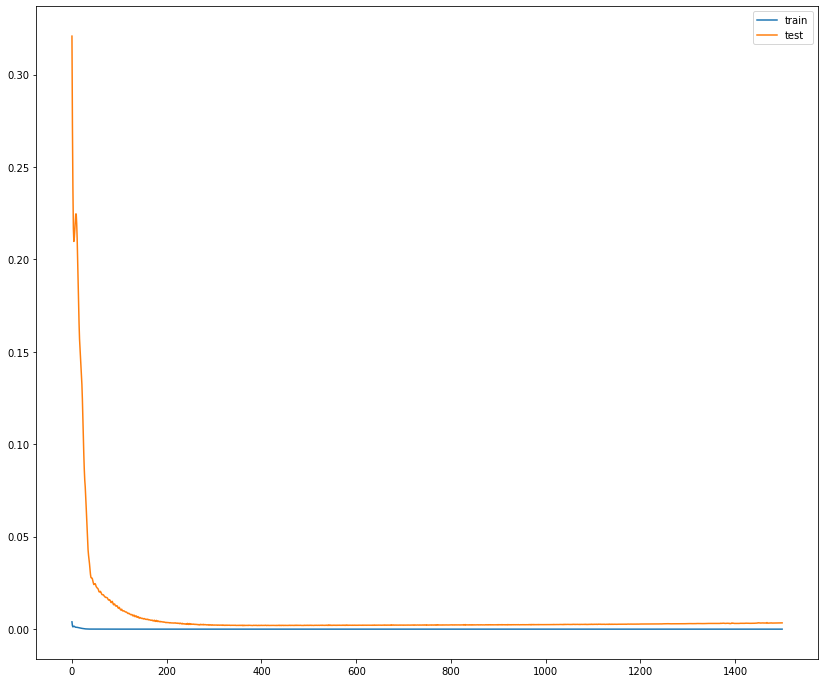

In [57]:
stateName = unique_states[19]
print(np.shape(df_state_all))
dataset =list_state_all[19]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#LSTM + CNN
subsequences = 1
timesteps = train_X.shape[1]
X_train_series_sub = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)


model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_valid_series_sub.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train_series_sub, train_y, validation_data=(X_valid_series_sub, test_y), epochs=1500, verbose=2)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction (LSTM + CNN)
yhat = model.predict(X_valid_series_sub)
#print(yhat)
test_X = X_valid_series_sub.reshape((X_valid_series_sub.shape[0], X_valid_series_sub.shape[2]))

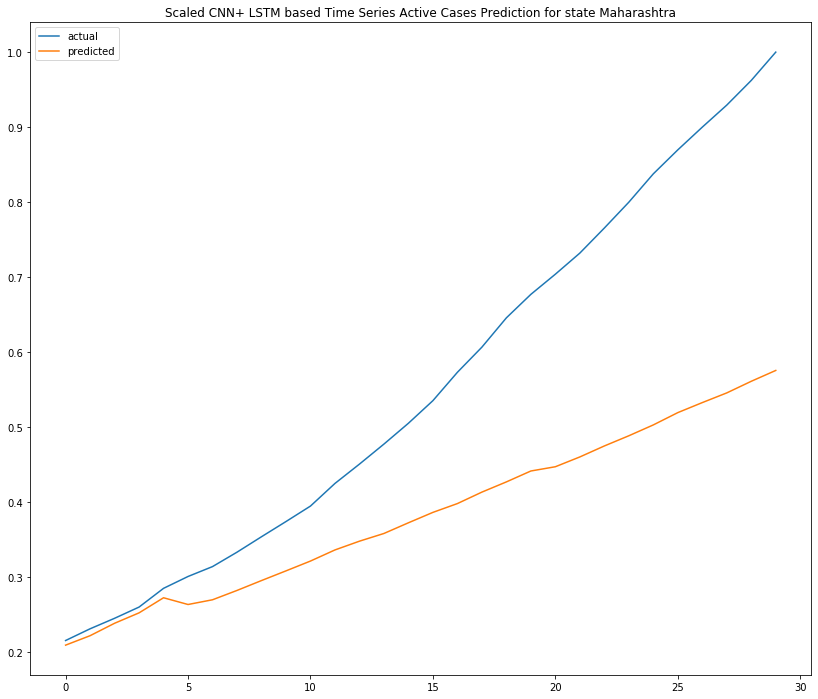

Test RMSE: 0.219
Test RMSE: 17059.422
30
2020-04-29T00:00:00.000000000


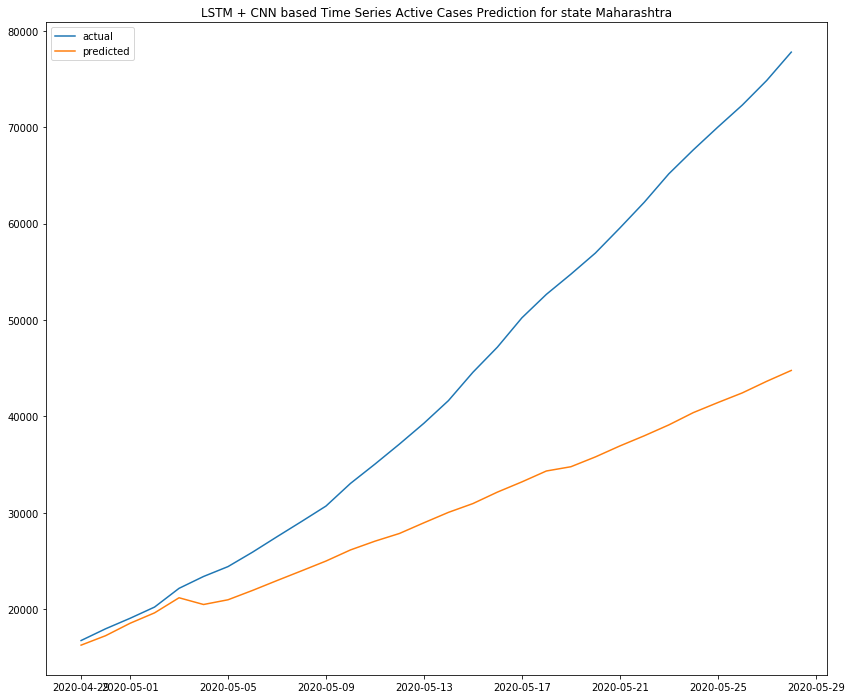

In [58]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled CNN+ LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM + CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# CNN based Prediction for Gujrat with all features

(4480, 29)
(128, 32)
Maharashtra
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(88, 46)
58
(58, 24)
(30, 24)
(58, 23) (58,) (30, 23) (30,)
(58, 23, 1) (58,) (30, 23, 1) (30,)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 22, 64)            192       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 10, 64)            8256      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 320)               0         
_________________

Epoch 107/2000
58/58 - 0s - loss: 4.2669e-06 - val_loss: 0.0862
Epoch 108/2000
58/58 - 0s - loss: 4.2427e-06 - val_loss: 0.0862
Epoch 109/2000
58/58 - 0s - loss: 4.1940e-06 - val_loss: 0.0863
Epoch 110/2000
58/58 - 0s - loss: 4.1469e-06 - val_loss: 0.0863
Epoch 111/2000
58/58 - 0s - loss: 4.1198e-06 - val_loss: 0.0863
Epoch 112/2000
58/58 - 0s - loss: 4.0894e-06 - val_loss: 0.0862
Epoch 113/2000
58/58 - 0s - loss: 4.0440e-06 - val_loss: 0.0861
Epoch 114/2000
58/58 - 0s - loss: 4.0048e-06 - val_loss: 0.0860
Epoch 115/2000
58/58 - 0s - loss: 3.9795e-06 - val_loss: 0.0860
Epoch 116/2000
58/58 - 0s - loss: 3.9517e-06 - val_loss: 0.0860
Epoch 117/2000
58/58 - 0s - loss: 3.9165e-06 - val_loss: 0.0860
Epoch 118/2000
58/58 - 0s - loss: 3.8876e-06 - val_loss: 0.0860
Epoch 119/2000
58/58 - 0s - loss: 3.8625e-06 - val_loss: 0.0859
Epoch 120/2000
58/58 - 0s - loss: 3.8328e-06 - val_loss: 0.0858
Epoch 121/2000
58/58 - 0s - loss: 3.8030e-06 - val_loss: 0.0857
Epoch 122/2000
58/58 - 0s - loss: 3.7782

58/58 - 0s - loss: 2.6761e-06 - val_loss: 0.0818
Epoch 236/2000
58/58 - 0s - loss: 2.6734e-06 - val_loss: 0.0818
Epoch 237/2000
58/58 - 0s - loss: 2.6704e-06 - val_loss: 0.0817
Epoch 238/2000
58/58 - 0s - loss: 2.6677e-06 - val_loss: 0.0817
Epoch 239/2000
58/58 - 0s - loss: 2.6648e-06 - val_loss: 0.0817
Epoch 240/2000
58/58 - 0s - loss: 2.6621e-06 - val_loss: 0.0817
Epoch 241/2000
58/58 - 0s - loss: 2.6593e-06 - val_loss: 0.0816
Epoch 242/2000
58/58 - 0s - loss: 2.6566e-06 - val_loss: 0.0816
Epoch 243/2000
58/58 - 0s - loss: 2.6540e-06 - val_loss: 0.0816
Epoch 244/2000
58/58 - 0s - loss: 2.6514e-06 - val_loss: 0.0815
Epoch 245/2000
58/58 - 0s - loss: 2.6488e-06 - val_loss: 0.0815
Epoch 246/2000
58/58 - 0s - loss: 2.6464e-06 - val_loss: 0.0815
Epoch 247/2000
58/58 - 0s - loss: 2.6440e-06 - val_loss: 0.0815
Epoch 248/2000
58/58 - 0s - loss: 2.6416e-06 - val_loss: 0.0814
Epoch 249/2000
58/58 - 0s - loss: 2.6393e-06 - val_loss: 0.0814
Epoch 250/2000
58/58 - 0s - loss: 2.6370e-06 - val_loss

Epoch 364/2000
58/58 - 0s - loss: 2.4119e-06 - val_loss: 0.0786
Epoch 365/2000
58/58 - 0s - loss: 2.4103e-06 - val_loss: 0.0786
Epoch 366/2000
58/58 - 0s - loss: 2.4085e-06 - val_loss: 0.0786
Epoch 367/2000
58/58 - 0s - loss: 2.4069e-06 - val_loss: 0.0785
Epoch 368/2000
58/58 - 0s - loss: 2.4049e-06 - val_loss: 0.0785
Epoch 369/2000
58/58 - 0s - loss: 2.4034e-06 - val_loss: 0.0785
Epoch 370/2000
58/58 - 0s - loss: 2.4017e-06 - val_loss: 0.0785
Epoch 371/2000
58/58 - 0s - loss: 2.4000e-06 - val_loss: 0.0784
Epoch 372/2000
58/58 - 0s - loss: 2.3983e-06 - val_loss: 0.0784
Epoch 373/2000
58/58 - 0s - loss: 2.3966e-06 - val_loss: 0.0784
Epoch 374/2000
58/58 - 0s - loss: 2.3948e-06 - val_loss: 0.0784
Epoch 375/2000
58/58 - 0s - loss: 2.3930e-06 - val_loss: 0.0784
Epoch 376/2000
58/58 - 0s - loss: 2.3912e-06 - val_loss: 0.0783
Epoch 377/2000
58/58 - 0s - loss: 2.3894e-06 - val_loss: 0.0783
Epoch 378/2000
58/58 - 0s - loss: 2.3877e-06 - val_loss: 0.0783
Epoch 379/2000
58/58 - 0s - loss: 2.3859

58/58 - 0s - loss: 2.2394e-06 - val_loss: 0.0759
Epoch 493/2000
58/58 - 0s - loss: 2.2383e-06 - val_loss: 0.0759
Epoch 494/2000
58/58 - 0s - loss: 2.2373e-06 - val_loss: 0.0759
Epoch 495/2000
58/58 - 0s - loss: 2.2363e-06 - val_loss: 0.0758
Epoch 496/2000
58/58 - 0s - loss: 2.2352e-06 - val_loss: 0.0758
Epoch 497/2000
58/58 - 0s - loss: 2.2341e-06 - val_loss: 0.0758
Epoch 498/2000
58/58 - 0s - loss: 2.2329e-06 - val_loss: 0.0758
Epoch 499/2000
58/58 - 0s - loss: 2.2319e-06 - val_loss: 0.0758
Epoch 500/2000
58/58 - 0s - loss: 2.2309e-06 - val_loss: 0.0758
Epoch 501/2000
58/58 - 0s - loss: 2.2300e-06 - val_loss: 0.0757
Epoch 502/2000
58/58 - 0s - loss: 2.2288e-06 - val_loss: 0.0757
Epoch 503/2000
58/58 - 0s - loss: 2.2278e-06 - val_loss: 0.0757
Epoch 504/2000
58/58 - 0s - loss: 2.2268e-06 - val_loss: 0.0757
Epoch 505/2000
58/58 - 0s - loss: 2.2258e-06 - val_loss: 0.0757
Epoch 506/2000
58/58 - 0s - loss: 2.2247e-06 - val_loss: 0.0756
Epoch 507/2000
58/58 - 0s - loss: 2.2236e-06 - val_loss

Epoch 621/2000
58/58 - 0s - loss: 2.0951e-06 - val_loss: 0.0734
Epoch 622/2000
58/58 - 0s - loss: 2.0940e-06 - val_loss: 0.0734
Epoch 623/2000
58/58 - 0s - loss: 2.0934e-06 - val_loss: 0.0734
Epoch 624/2000
58/58 - 0s - loss: 2.0924e-06 - val_loss: 0.0733
Epoch 625/2000
58/58 - 0s - loss: 2.0914e-06 - val_loss: 0.0733
Epoch 626/2000
58/58 - 0s - loss: 2.0903e-06 - val_loss: 0.0733
Epoch 627/2000
58/58 - 0s - loss: 2.0892e-06 - val_loss: 0.0733
Epoch 628/2000
58/58 - 0s - loss: 2.0879e-06 - val_loss: 0.0733
Epoch 629/2000
58/58 - 0s - loss: 2.0866e-06 - val_loss: 0.0732
Epoch 630/2000
58/58 - 0s - loss: 2.0853e-06 - val_loss: 0.0732
Epoch 631/2000
58/58 - 0s - loss: 2.0845e-06 - val_loss: 0.0732
Epoch 632/2000
58/58 - 0s - loss: 2.0841e-06 - val_loss: 0.0732
Epoch 633/2000
58/58 - 0s - loss: 2.0827e-06 - val_loss: 0.0731
Epoch 634/2000
58/58 - 0s - loss: 2.0811e-06 - val_loss: 0.0731
Epoch 635/2000
58/58 - 0s - loss: 2.0801e-06 - val_loss: 0.0731
Epoch 636/2000
58/58 - 0s - loss: 2.0793

58/58 - 0s - loss: 1.9441e-06 - val_loss: 0.0710
Epoch 750/2000
58/58 - 0s - loss: 1.9432e-06 - val_loss: 0.0710
Epoch 751/2000
58/58 - 0s - loss: 1.9419e-06 - val_loss: 0.0710
Epoch 752/2000
58/58 - 0s - loss: 1.9404e-06 - val_loss: 0.0710
Epoch 753/2000
58/58 - 0s - loss: 1.9391e-06 - val_loss: 0.0710
Epoch 754/2000
58/58 - 0s - loss: 1.9381e-06 - val_loss: 0.0709
Epoch 755/2000
58/58 - 0s - loss: 1.9370e-06 - val_loss: 0.0709
Epoch 756/2000
58/58 - 0s - loss: 1.9357e-06 - val_loss: 0.0709
Epoch 757/2000
58/58 - 0s - loss: 1.9345e-06 - val_loss: 0.0709
Epoch 758/2000
58/58 - 0s - loss: 1.9334e-06 - val_loss: 0.0709
Epoch 759/2000
58/58 - 0s - loss: 1.9322e-06 - val_loss: 0.0708
Epoch 760/2000
58/58 - 0s - loss: 1.9306e-06 - val_loss: 0.0708
Epoch 761/2000
58/58 - 0s - loss: 1.9296e-06 - val_loss: 0.0708
Epoch 762/2000
58/58 - 0s - loss: 1.9285e-06 - val_loss: 0.0708
Epoch 763/2000
58/58 - 0s - loss: 1.9274e-06 - val_loss: 0.0707
Epoch 764/2000
58/58 - 0s - loss: 1.9260e-06 - val_loss

Epoch 878/2000
58/58 - 0s - loss: 1.8209e-06 - val_loss: 0.0667
Epoch 879/2000
58/58 - 0s - loss: 1.8319e-06 - val_loss: 0.0669
Epoch 880/2000
58/58 - 0s - loss: 1.8469e-06 - val_loss: 0.0666
Epoch 881/2000
58/58 - 0s - loss: 1.8663e-06 - val_loss: 0.0669
Epoch 882/2000
58/58 - 0s - loss: 1.8874e-06 - val_loss: 0.0665
Epoch 883/2000
58/58 - 0s - loss: 1.9080e-06 - val_loss: 0.0668
Epoch 884/2000
58/58 - 0s - loss: 1.9231e-06 - val_loss: 0.0664
Epoch 885/2000
58/58 - 0s - loss: 1.9256e-06 - val_loss: 0.0668
Epoch 886/2000
58/58 - 0s - loss: 1.9103e-06 - val_loss: 0.0663
Epoch 887/2000
58/58 - 0s - loss: 1.8800e-06 - val_loss: 0.0666
Epoch 888/2000
58/58 - 0s - loss: 1.8417e-06 - val_loss: 0.0664
Epoch 889/2000
58/58 - 0s - loss: 1.8048e-06 - val_loss: 0.0665
Epoch 890/2000
58/58 - 0s - loss: 1.7801e-06 - val_loss: 0.0664
Epoch 891/2000
58/58 - 0s - loss: 1.7719e-06 - val_loss: 0.0663
Epoch 892/2000
58/58 - 0s - loss: 1.7783e-06 - val_loss: 0.0664
Epoch 893/2000
58/58 - 0s - loss: 1.7934

Epoch 1006/2000
58/58 - 0s - loss: 5.8626e-06 - val_loss: 0.0675
Epoch 1007/2000
58/58 - 0s - loss: 8.4155e-06 - val_loss: 0.0636
Epoch 1008/2000
58/58 - 0s - loss: 1.0868e-05 - val_loss: 0.0653
Epoch 1009/2000
58/58 - 0s - loss: 4.0111e-06 - val_loss: 0.0685
Epoch 1010/2000
58/58 - 0s - loss: 1.1068e-05 - val_loss: 0.0661
Epoch 1011/2000
58/58 - 0s - loss: 3.1211e-06 - val_loss: 0.0639
Epoch 1012/2000
58/58 - 0s - loss: 9.4590e-06 - val_loss: 0.0664
Epoch 1013/2000
58/58 - 0s - loss: 3.7444e-06 - val_loss: 0.0673
Epoch 1014/2000
58/58 - 0s - loss: 7.0232e-06 - val_loss: 0.0646
Epoch 1015/2000
58/58 - 0s - loss: 4.6686e-06 - val_loss: 0.0645
Epoch 1016/2000
58/58 - 0s - loss: 4.9988e-06 - val_loss: 0.0670
Epoch 1017/2000
58/58 - 0s - loss: 5.3392e-06 - val_loss: 0.0666
Epoch 1018/2000
58/58 - 0s - loss: 3.5762e-06 - val_loss: 0.0648
Epoch 1019/2000
58/58 - 0s - loss: 5.4734e-06 - val_loss: 0.0660
Epoch 1020/2000
58/58 - 0s - loss: 2.8469e-06 - val_loss: 0.0676
Epoch 1021/2000
58/58 - 0

58/58 - 0s - loss: 1.8376e-06 - val_loss: 0.0618
Epoch 1133/2000
58/58 - 0s - loss: 1.8359e-06 - val_loss: 0.0618
Epoch 1134/2000
58/58 - 0s - loss: 1.8340e-06 - val_loss: 0.0617
Epoch 1135/2000
58/58 - 0s - loss: 1.8333e-06 - val_loss: 0.0617
Epoch 1136/2000
58/58 - 0s - loss: 1.8317e-06 - val_loss: 0.0617
Epoch 1137/2000
58/58 - 0s - loss: 1.8295e-06 - val_loss: 0.0616
Epoch 1138/2000
58/58 - 0s - loss: 1.8285e-06 - val_loss: 0.0616
Epoch 1139/2000
58/58 - 0s - loss: 1.8277e-06 - val_loss: 0.0615
Epoch 1140/2000
58/58 - 0s - loss: 1.8263e-06 - val_loss: 0.0615
Epoch 1141/2000
58/58 - 0s - loss: 1.8243e-06 - val_loss: 0.0615
Epoch 1142/2000
58/58 - 0s - loss: 1.8229e-06 - val_loss: 0.0614
Epoch 1143/2000
58/58 - 0s - loss: 1.8213e-06 - val_loss: 0.0614
Epoch 1144/2000
58/58 - 0s - loss: 1.8191e-06 - val_loss: 0.0614
Epoch 1145/2000
58/58 - 0s - loss: 1.8180e-06 - val_loss: 0.0613
Epoch 1146/2000
58/58 - 0s - loss: 1.8169e-06 - val_loss: 0.0613
Epoch 1147/2000
58/58 - 0s - loss: 1.8147

Epoch 1259/2000
58/58 - 0s - loss: 1.5761e-06 - val_loss: 0.0551
Epoch 1260/2000
58/58 - 0s - loss: 1.5738e-06 - val_loss: 0.0551
Epoch 1261/2000
58/58 - 0s - loss: 1.5714e-06 - val_loss: 0.0550
Epoch 1262/2000
58/58 - 0s - loss: 1.5691e-06 - val_loss: 0.0549
Epoch 1263/2000
58/58 - 0s - loss: 1.5668e-06 - val_loss: 0.0548
Epoch 1264/2000
58/58 - 0s - loss: 1.5645e-06 - val_loss: 0.0548
Epoch 1265/2000
58/58 - 0s - loss: 1.5622e-06 - val_loss: 0.0547
Epoch 1266/2000
58/58 - 0s - loss: 1.5600e-06 - val_loss: 0.0546
Epoch 1267/2000
58/58 - 0s - loss: 1.5579e-06 - val_loss: 0.0546
Epoch 1268/2000
58/58 - 0s - loss: 1.5557e-06 - val_loss: 0.0545
Epoch 1269/2000
58/58 - 0s - loss: 1.5534e-06 - val_loss: 0.0544
Epoch 1270/2000
58/58 - 0s - loss: 1.5515e-06 - val_loss: 0.0544
Epoch 1271/2000
58/58 - 0s - loss: 1.5496e-06 - val_loss: 0.0543
Epoch 1272/2000
58/58 - 0s - loss: 1.5477e-06 - val_loss: 0.0542
Epoch 1273/2000
58/58 - 0s - loss: 1.5458e-06 - val_loss: 0.0542
Epoch 1274/2000
58/58 - 0

58/58 - 0s - loss: 1.3380e-06 - val_loss: 0.0479
Epoch 1386/2000
58/58 - 0s - loss: 1.3356e-06 - val_loss: 0.0473
Epoch 1387/2000
58/58 - 0s - loss: 1.4587e-06 - val_loss: 0.0495
Epoch 1388/2000
58/58 - 0s - loss: 1.6321e-06 - val_loss: 0.0502
Epoch 1389/2000
58/58 - 0s - loss: 1.6428e-06 - val_loss: 0.0518
Epoch 1390/2000
58/58 - 0s - loss: 1.3704e-06 - val_loss: 0.0529
Epoch 1391/2000
58/58 - 0s - loss: 1.4705e-06 - val_loss: 0.0529
Epoch 1392/2000
58/58 - 0s - loss: 1.5907e-06 - val_loss: 0.0540
Epoch 1393/2000
58/58 - 0s - loss: 1.3952e-06 - val_loss: 0.0543
Epoch 1394/2000
58/58 - 0s - loss: 1.3673e-06 - val_loss: 0.0540
Epoch 1395/2000
58/58 - 0s - loss: 1.5273e-06 - val_loss: 0.0545
Epoch 1396/2000
58/58 - 0s - loss: 1.4607e-06 - val_loss: 0.0541
Epoch 1397/2000
58/58 - 0s - loss: 1.3294e-06 - val_loss: 0.0539
Epoch 1398/2000
58/58 - 0s - loss: 1.4085e-06 - val_loss: 0.0544
Epoch 1399/2000
58/58 - 0s - loss: 1.4516e-06 - val_loss: 0.0541
Epoch 1400/2000
58/58 - 0s - loss: 1.3442

Epoch 1512/2000
58/58 - 0s - loss: 1.1472e-06 - val_loss: 0.0518
Epoch 1513/2000
58/58 - 0s - loss: 1.1483e-06 - val_loss: 0.0518
Epoch 1514/2000
58/58 - 0s - loss: 1.1409e-06 - val_loss: 0.0519
Epoch 1515/2000
58/58 - 0s - loss: 1.1396e-06 - val_loss: 0.0518
Epoch 1516/2000
58/58 - 0s - loss: 1.1340e-06 - val_loss: 0.0519
Epoch 1517/2000
58/58 - 0s - loss: 1.1344e-06 - val_loss: 0.0518
Epoch 1518/2000
58/58 - 0s - loss: 1.1335e-06 - val_loss: 0.0519
Epoch 1519/2000
58/58 - 0s - loss: 1.1386e-06 - val_loss: 0.0517
Epoch 1520/2000
58/58 - 0s - loss: 1.1328e-06 - val_loss: 0.0517
Epoch 1521/2000
58/58 - 0s - loss: 1.1309e-06 - val_loss: 0.0517
Epoch 1522/2000
58/58 - 0s - loss: 1.1248e-06 - val_loss: 0.0517
Epoch 1523/2000
58/58 - 0s - loss: 1.1313e-06 - val_loss: 0.0516
Epoch 1524/2000
58/58 - 0s - loss: 1.1216e-06 - val_loss: 0.0514
Epoch 1525/2000
58/58 - 0s - loss: 1.1345e-06 - val_loss: 0.0515
Epoch 1526/2000
58/58 - 0s - loss: 1.1385e-06 - val_loss: 0.0515
Epoch 1527/2000
58/58 - 0

58/58 - 0s - loss: 1.0154e-06 - val_loss: 0.0494
Epoch 1639/2000
58/58 - 0s - loss: 1.0131e-06 - val_loss: 0.0499
Epoch 1640/2000
58/58 - 0s - loss: 1.1650e-06 - val_loss: 0.0493
Epoch 1641/2000
58/58 - 0s - loss: 1.4209e-06 - val_loss: 0.0505
Epoch 1642/2000
58/58 - 0s - loss: 1.6255e-06 - val_loss: 0.0495
Epoch 1643/2000
58/58 - 0s - loss: 1.5582e-06 - val_loss: 0.0500
Epoch 1644/2000
58/58 - 0s - loss: 1.2909e-06 - val_loss: 0.0492
Epoch 1645/2000
58/58 - 0s - loss: 1.1032e-06 - val_loss: 0.0495
Epoch 1646/2000
58/58 - 0s - loss: 9.9521e-07 - val_loss: 0.0497
Epoch 1647/2000
58/58 - 0s - loss: 9.7186e-07 - val_loss: 0.0497
Epoch 1648/2000
58/58 - 0s - loss: 1.0631e-06 - val_loss: 0.0502
Epoch 1649/2000
58/58 - 0s - loss: 1.1300e-06 - val_loss: 0.0495
Epoch 1650/2000
58/58 - 0s - loss: 1.1185e-06 - val_loss: 0.0499
Epoch 1651/2000
58/58 - 0s - loss: 1.1164e-06 - val_loss: 0.0493
Epoch 1652/2000
58/58 - 0s - loss: 1.1061e-06 - val_loss: 0.0498
Epoch 1653/2000
58/58 - 0s - loss: 1.0628

Epoch 1765/2000
58/58 - 0s - loss: 8.5117e-07 - val_loss: 0.0485
Epoch 1766/2000
58/58 - 0s - loss: 1.0009e-06 - val_loss: 0.0493
Epoch 1767/2000
58/58 - 0s - loss: 1.2311e-06 - val_loss: 0.0484
Epoch 1768/2000
58/58 - 0s - loss: 1.3563e-06 - val_loss: 0.0491
Epoch 1769/2000
58/58 - 0s - loss: 1.2892e-06 - val_loss: 0.0482
Epoch 1770/2000
58/58 - 0s - loss: 1.1624e-06 - val_loss: 0.0489
Epoch 1771/2000
58/58 - 0s - loss: 1.0157e-06 - val_loss: 0.0486
Epoch 1772/2000
58/58 - 0s - loss: 8.8963e-07 - val_loss: 0.0488
Epoch 1773/2000
58/58 - 0s - loss: 8.2577e-07 - val_loss: 0.0488
Epoch 1774/2000
58/58 - 0s - loss: 8.3003e-07 - val_loss: 0.0483
Epoch 1775/2000
58/58 - 0s - loss: 9.3255e-07 - val_loss: 0.0489
Epoch 1776/2000
58/58 - 0s - loss: 1.0572e-06 - val_loss: 0.0483
Epoch 1777/2000
58/58 - 0s - loss: 1.1653e-06 - val_loss: 0.0494
Epoch 1778/2000
58/58 - 0s - loss: 1.2659e-06 - val_loss: 0.0486
Epoch 1779/2000
58/58 - 0s - loss: 1.2340e-06 - val_loss: 0.0491
Epoch 1780/2000
58/58 - 0

58/58 - 0s - loss: 8.4866e-07 - val_loss: 0.0472
Epoch 1892/2000
58/58 - 0s - loss: 9.3084e-07 - val_loss: 0.0482
Epoch 1893/2000
58/58 - 0s - loss: 1.0955e-06 - val_loss: 0.0475
Epoch 1894/2000
58/58 - 0s - loss: 1.2146e-06 - val_loss: 0.0481
Epoch 1895/2000
58/58 - 0s - loss: 1.2556e-06 - val_loss: 0.0469
Epoch 1896/2000
58/58 - 0s - loss: 1.2791e-06 - val_loss: 0.0478
Epoch 1897/2000
58/58 - 0s - loss: 1.3687e-06 - val_loss: 0.0468
Epoch 1898/2000
58/58 - 0s - loss: 1.4569e-06 - val_loss: 0.0482
Epoch 1899/2000
58/58 - 0s - loss: 1.6005e-06 - val_loss: 0.0471
Epoch 1900/2000
58/58 - 0s - loss: 1.6526e-06 - val_loss: 0.0482
Epoch 1901/2000
58/58 - 0s - loss: 1.5580e-06 - val_loss: 0.0469
Epoch 1902/2000
58/58 - 0s - loss: 1.3767e-06 - val_loss: 0.0478
Epoch 1903/2000
58/58 - 0s - loss: 1.2562e-06 - val_loss: 0.0469
Epoch 1904/2000
58/58 - 0s - loss: 1.1483e-06 - val_loss: 0.0480
Epoch 1905/2000
58/58 - 0s - loss: 1.0769e-06 - val_loss: 0.0474
Epoch 1906/2000
58/58 - 0s - loss: 9.9613

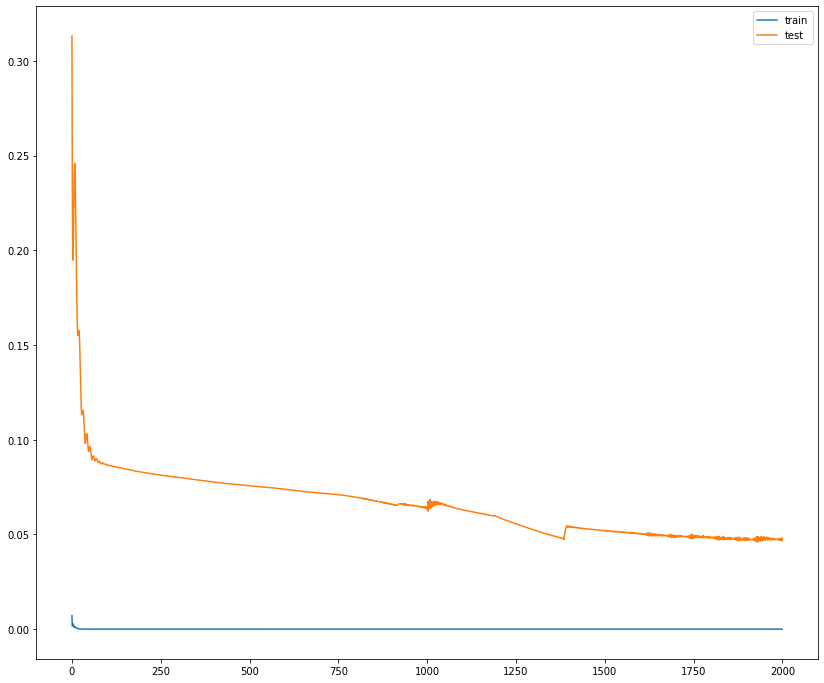

(58, 23, 1) (58,) (30, 23) (30,)


In [55]:
stateName = unique_states[19]
print(np.shape(df_state_all))
dataset =list_state_all[19]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values))
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
#fit model
history =model.fit(train_X, train_y, epochs=2000, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

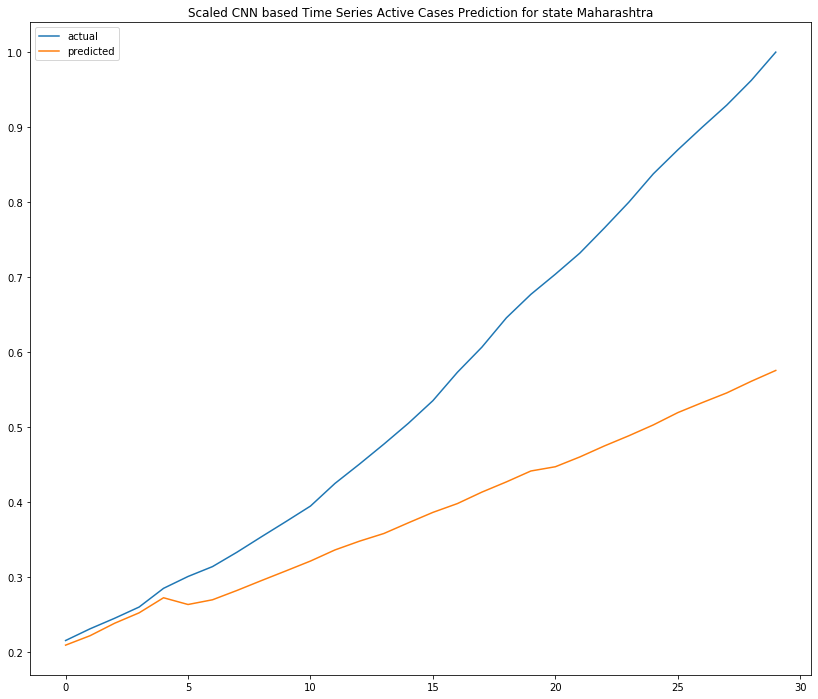

Test RMSE: 0.219
Test RMSE: 17059.422
30
2020-04-29T00:00:00.000000000


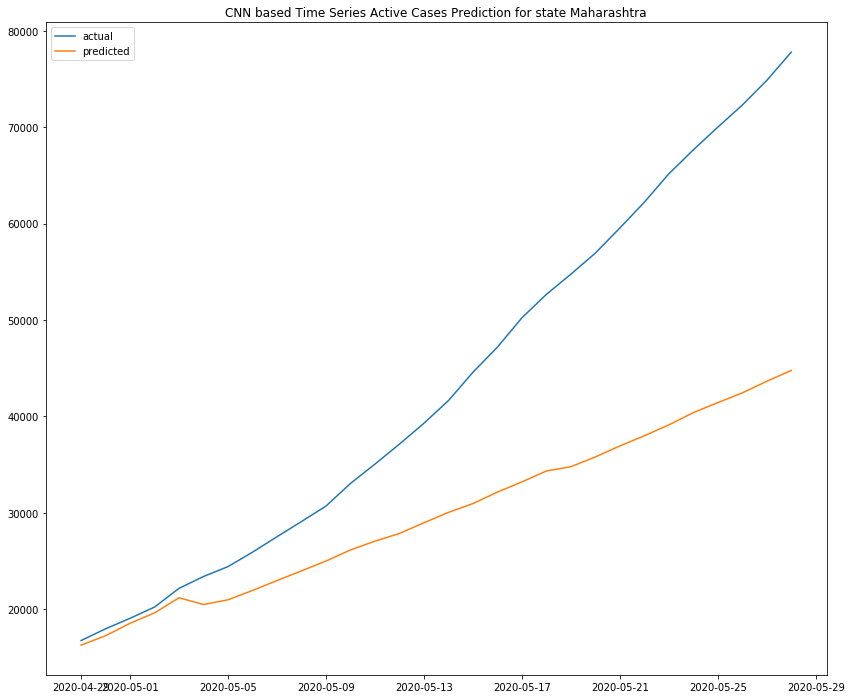

In [56]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('CNN based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# LSTM based Prediction for Gujrat with all features

In [53]:
stateName = unique_states[19]
print(np.shape(df_state_all))
dataset =list_state_all[19]
dataset = dataset.sort_values(by='Date', ascending=True)
print(np.shape(dataset))
print(stateName)
dataset = dataset[(dataset['Date'] >= '2020-03-01') & (dataset['Date'] <= '2020-06-06')]

daterange = dataset['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]
print(dateStart)
print(dateEnd)

dataset = dataset[['Total Confirmed cases','Death',
       'Cured/Discharged/Migrated', 'coronaenquirycalls',
       'cumulativepeopleinquarantine', 'negative', 'numcallsstatehelpline',
       'numicubeds', 'numisolationbeds', 'numventilators',
       'populationncp2019projection', 'positive',
       'testpositivityrate',
       'testspermillion', 'testsperpositivecase', 'testsperthousand',
       'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'Active Cases']]
print(np.shape(dataset))

#no_features = 22
no_features = np.shape(dataset)[1]-1
print("No of features", no_features)
values = dataset.values


values = values.astype('float32')
print(np.shape(values))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(np.shape(scaled))
reframed = series_to_supervised(scaled, 1, 1)
print(np.shape(reframed))

reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]], axis=1, inplace=True)


values = reframed.values
split_factor = int(dataset.shape[0]*0.6)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])
model = Sequential()
#model.add(Bidirectional(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=1500, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)


y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4480, 29)
(128, 32)
Maharashtra
2020-03-01T00:00:00.000000000
2020-06-05T00:00:00.000000000
(97, 23)
No of features 22
(97, 23)
(97, 23)
(88, 46)
58
(58, 24)
(30, 24)
(58, 23) (58,) (30, 23) (30,)
(58, 1, 23) (58,) (30, 1, 23) (30,)
1 23
Train on 58 samples, validate on 30 samples
Epoch 1/1500
58/58 - 3s - loss: 0.0367 - val_loss: 0.5358
Epoch 2/1500
58/58 - 0s - loss: 0.0328 - val_loss: 0.5263
Epoch 3/1500
58/58 - 0s - loss: 0.0312 - val_loss: 0.5177
Epoch 4/1500
58/58 - 0s - loss: 0.0301 - val_loss: 0.5098
Epoch 5/1500
58/58 - 0s - loss: 0.0291 - val_loss: 0.5025
Epoch 6/1500
58/58 - 0s - loss: 0.0281 - val_loss: 0.4956
Epoch 7/1500
58/58 - 0s - loss: 0.0272 - val_loss: 0.4892
Epoch 8/1500
58/58 - 0s - loss: 0.0262 - val_loss: 0.4832
Epoch 9/1500
58/58 - 0s - loss: 0.0251 - val_loss: 0.4774
Epoch 10/1500
58/58 - 0s - loss: 0.0239 - val_loss: 0.4718
Epoch 11/1500
58/58 - 0s - loss: 0.0228 - val_loss: 0.4661
Epoch 12/1500
58/58 - 0s - loss: 0.0221 - val_loss: 0.4601
Epoch 13/1500
58/5

Epoch 135/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0150
Epoch 136/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0155
Epoch 137/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0157
Epoch 138/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0153
Epoch 139/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0157
Epoch 140/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0165
Epoch 141/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0160
Epoch 142/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0163
Epoch 143/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0170
Epoch 144/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0174
Epoch 145/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0172
Epoch 146/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0174
Epoch 147/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0180
Epoch 148/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0182
Epoch 149/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0180
Epoch 150/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0182
Epoch 151/1500
58/58 - 0s - loss: 0.0014

Epoch 272/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0404
Epoch 273/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0413
Epoch 274/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0420
Epoch 275/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0432
Epoch 276/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0415
Epoch 277/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0414
Epoch 278/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0409
Epoch 279/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0414
Epoch 280/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0415
Epoch 281/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0426
Epoch 282/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0422
Epoch 283/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0430
Epoch 284/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0413
Epoch 285/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0411
Epoch 286/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0415
Epoch 287/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0395
Epoch 288/1500
58/58 - 0s - loss: 0.0012

Epoch 409/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0438
Epoch 410/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0428
Epoch 411/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0436
Epoch 412/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0415
Epoch 413/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0411
Epoch 414/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0419
Epoch 415/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0434
Epoch 416/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0419
Epoch 417/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0425
Epoch 418/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0410
Epoch 419/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0402
Epoch 420/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0403
Epoch 421/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0412
Epoch 422/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0424
Epoch 423/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0441
Epoch 424/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0442
Epoch 425/1500
58/58 - 0s - loss: 0.0012

Epoch 546/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0363
Epoch 547/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0341
Epoch 548/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0340
Epoch 549/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0334
Epoch 550/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0325
Epoch 551/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0333
Epoch 552/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0353
Epoch 553/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0349
Epoch 554/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0356
Epoch 555/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0380
Epoch 556/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0374
Epoch 557/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0345
Epoch 558/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0341
Epoch 559/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0349
Epoch 560/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0335
Epoch 561/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0334
Epoch 562/1500
58/58 - 0s - loss: 0.0013

Epoch 683/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0251
Epoch 684/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0258
Epoch 685/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0279
Epoch 686/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0282
Epoch 687/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0284
Epoch 688/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0298
Epoch 689/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0291
Epoch 690/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0268
Epoch 691/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0263
Epoch 692/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0266
Epoch 693/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0261
Epoch 694/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0265
Epoch 695/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0277
Epoch 696/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0300
Epoch 697/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0301
Epoch 698/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0285
Epoch 699/1500
58/58 - 0s - loss: 0.0014

Epoch 820/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0212
Epoch 821/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0203
Epoch 822/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0194
Epoch 823/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0193
Epoch 824/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0203
Epoch 825/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0204
Epoch 826/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0203
Epoch 827/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0208
Epoch 828/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0224
Epoch 829/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0221
Epoch 830/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0204
Epoch 831/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0200
Epoch 832/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0204
Epoch 833/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0195
Epoch 834/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0190
Epoch 835/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0193
Epoch 836/1500
58/58 - 0s - loss: 0.0011

Epoch 957/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0188
Epoch 958/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0189
Epoch 959/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0203
Epoch 960/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0202
Epoch 961/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0188
Epoch 962/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0186
Epoch 963/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0194
Epoch 964/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0186
Epoch 965/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0171
Epoch 966/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0165
Epoch 967/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0167
Epoch 968/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0171
Epoch 969/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0168
Epoch 970/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0168
Epoch 971/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0175
Epoch 972/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0171
Epoch 973/1500
58/58 - 0s - loss: 0.0013

58/58 - 0s - loss: 0.0011 - val_loss: 0.0208
Epoch 1093/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0204
Epoch 1094/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0193
Epoch 1095/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0192
Epoch 1096/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0182
Epoch 1097/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0175
Epoch 1098/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0182
Epoch 1099/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0201
Epoch 1100/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0202
Epoch 1101/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0193
Epoch 1102/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0200
Epoch 1103/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0195
Epoch 1104/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0175
Epoch 1105/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0169
Epoch 1106/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0171
Epoch 1107/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0173
Epoch 1108/1500
58/58 - 0s - loss: 0.001

Epoch 1227/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0120
Epoch 1228/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0122
Epoch 1229/1500
58/58 - 0s - loss: 0.0017 - val_loss: 0.0121
Epoch 1230/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0122
Epoch 1231/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0122
Epoch 1232/1500
58/58 - 0s - loss: 0.0015 - val_loss: 0.0118
Epoch 1233/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0119
Epoch 1234/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0118
Epoch 1235/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0125
Epoch 1236/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0125
Epoch 1237/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0120
Epoch 1238/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0117
Epoch 1239/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0115
Epoch 1240/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0110
Epoch 1241/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0111
Epoch 1242/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0112
Epoch 1243/1500
58/58 - 

Epoch 1362/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0116
Epoch 1363/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0110
Epoch 1364/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0108
Epoch 1365/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0105
Epoch 1366/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0107
Epoch 1367/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0108
Epoch 1368/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0108
Epoch 1369/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0113
Epoch 1370/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0110
Epoch 1371/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0105
Epoch 1372/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0101
Epoch 1373/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0098
Epoch 1374/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0095
Epoch 1375/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0096
Epoch 1376/1500
58/58 - 0s - loss: 0.0012 - val_loss: 0.0096
Epoch 1377/1500
58/58 - 0s - loss: 0.0011 - val_loss: 0.0098
Epoch 1378/1500
58/58 - 

Epoch 1497/1500
58/58 - 0s - loss: 0.0014 - val_loss: 0.0079
Epoch 1498/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0080
Epoch 1499/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0080
Epoch 1500/1500
58/58 - 0s - loss: 0.0013 - val_loss: 0.0074
(58, 1, 23) (58,) (30, 23) (30,)


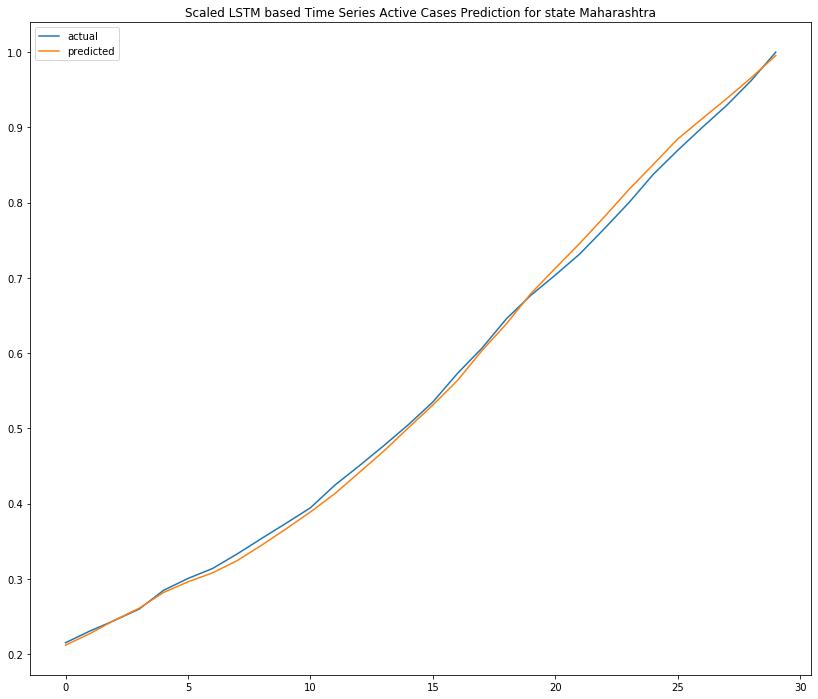

Test RMSE: 0.009
Test RMSE: 674.269
30
2020-04-29T00:00:00.000000000


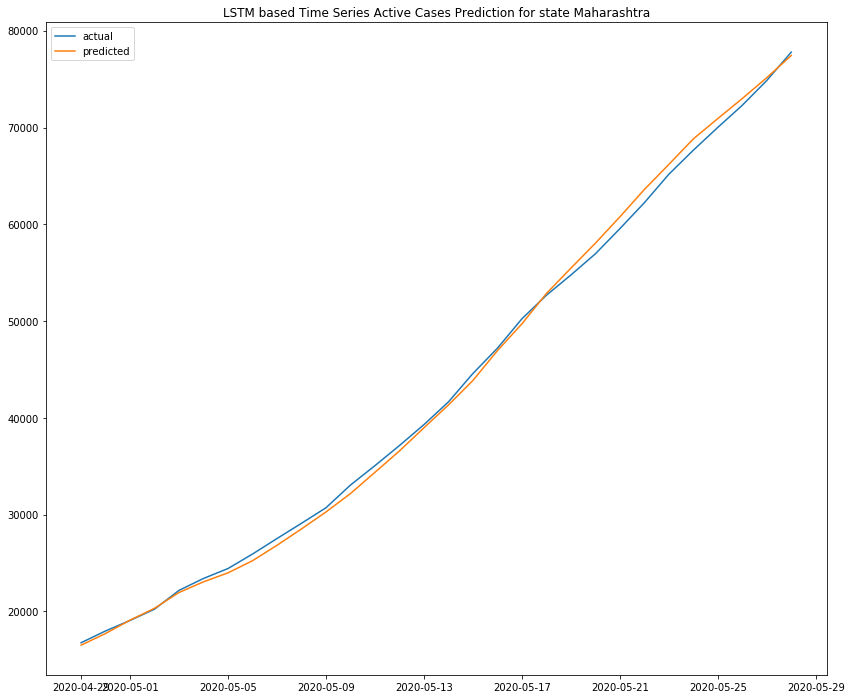

In [54]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
print(pred_len)
dateEnd = daterange[split_factor+1]
print(dateEnd)
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')
#print(pred_index)

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()